### Name: Anjali Jagdish Tavhare

# Network Intrusion Detection System 

In [1]:
import pandas as pd
import numpy as np

In [122]:
data = pd.read_csv("C:/Users/91968/Desktop/IIT/2nd_sem/Machine_Learning/Project/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master/datasets")

In [3]:
data.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [75]:
data.shape

(175341, 44)

In [163]:
# Check for duplicate rows in the main dataset, excluding the 'id' column
duplicate_count_excluding_id = data.drop(columns=['id']).duplicated().sum()
duplicate_count_excluding_id


67601

In [164]:
# Check the number of unique 'id' values in the main dataset
unique_id_count = data['id'].nunique()
unique_id_count


175341

In [5]:
data_features = pd.read_csv("C:/Users/91968/Desktop/IIT/2nd_sem/Machine_Learning/Project/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master/datasets/UNSW_NB15_features.csv")

In [6]:
data_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [7]:
data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [8]:
data['service'].unique()

array(['-', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [9]:
data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [10]:
for i in data.columns:
    print(data[i].unique())

[     1      2      3 ... 175339 175340 175341]
[0.121478 0.649902 1.623129 ... 3.71911  0.996503 1.557125]
['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 

In [11]:
# WE NEED TO FIX THE SERVICES COLUMN:

In [12]:
data[data['service'] == '-'].count()

id                   94168
dur                  94168
proto                94168
service              94168
state                94168
spkts                94168
dpkts                94168
sbytes               94168
dbytes               94168
rate                 94168
sttl                 94168
dttl                 94168
sload                94168
dload                94168
sloss                94168
dloss                94168
sinpkt               94168
dinpkt               94168
sjit                 94168
djit                 94168
swin                 94168
stcpb                94168
dtcpb                94168
dwin                 94168
tcprtt               94168
synack               94168
ackdat               94168
smean                94168
dmean                94168
trans_depth          94168
response_body_len    94168
ct_srv_src           94168
ct_state_ttl         94168
ct_dst_ltm           94168
ct_src_dport_ltm     94168
ct_dst_sport_ltm     94168
ct_dst_src_ltm       94168
i

In [13]:
# there are a lot of rows with - as the service, but we cannot just delete it. hence replace the dash with Nan.

In [14]:
data['service'].replace('-',np.nan,inplace=True)

C:\Users\anjal\AppData\Local\Temp\ipykernel_24008\1851727398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['service'].replace('-',np.nan,inplace=True)


In [15]:
data['service'].unique()

array([nan, 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [16]:
 data.shape

(175341, 45)

In [17]:
data.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

## Visualization and EDA

In [18]:
# Distribution of the 'label' variable (0 for normal, 1 for attack) as a pie chart
label_distribution = data['label'].value_counts()

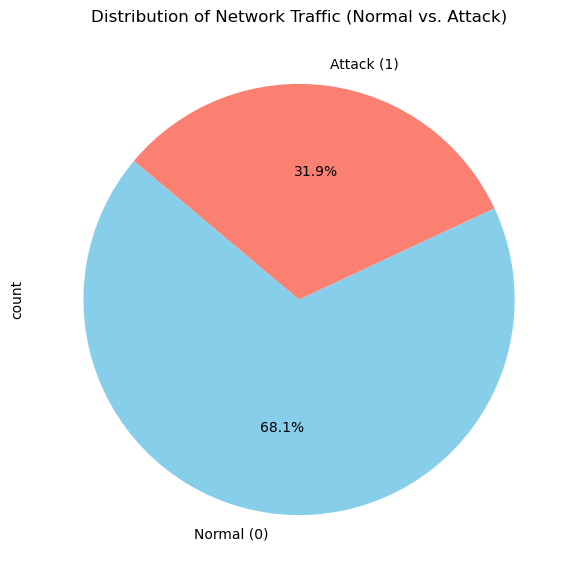

In [19]:

# Plotting the pie chart
pie_chart = label_distribution.plot(kind='pie', labels=['Normal (0)', 'Attack (1)'], autopct='%1.1f%%',
                                    startangle=140, colors=['skyblue', 'salmon'], figsize=(7, 7),
                                    title='Distribution of Network Traffic (Normal vs. Attack)').get_figure()

# Save the plot
#pie_chart_path = '/mnt/data/label_distribution_pie_chart.png'
#pie_chart.savefig(pie_chart_path)




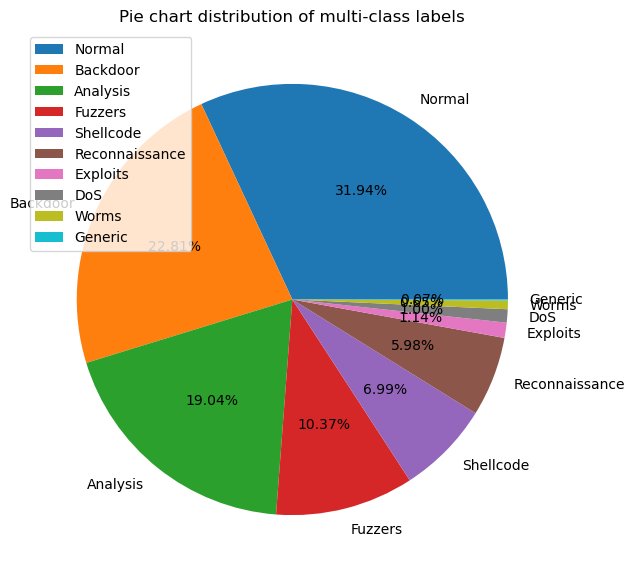

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
#plt.savefig('plots/Pie_chart_multi.png')
plt.show()

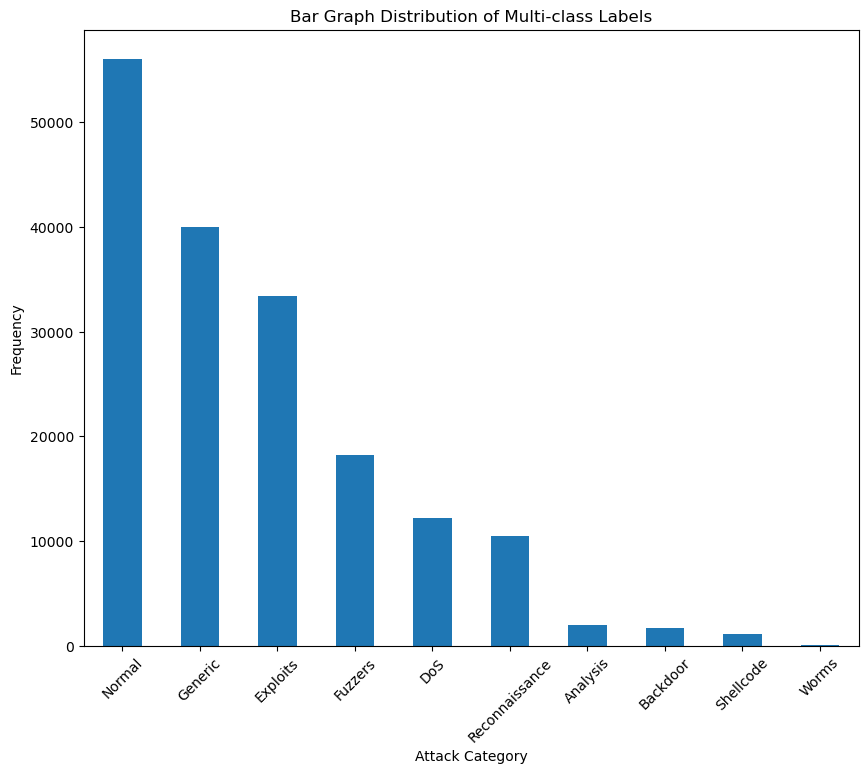

In [21]:
attack_cat_counts = data['attack_cat'].value_counts()

plt.figure(figsize=(10, 8))
attack_cat_counts.plot(kind='bar')
plt.title('Bar Graph Distribution of Multi-class Labels')
plt.xlabel('Attack Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
#plt.savefig('Pie_chart_multi.png')  # Save the figure
plt.show()

In [22]:
# analyzing the attacked records:

attack_data = data[data['label'] == 1]


In [23]:
attack_summary_statistics = attack_data.describe()


In [24]:
# dropping the ID column:

data = data.drop(['id'], axis=1)

In [25]:
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,tcp,NaN,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


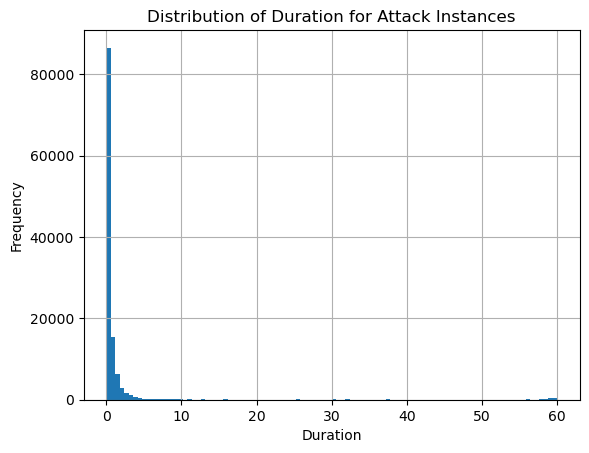

In [26]:
import matplotlib.pyplot as plt

# Example for visualizing the distribution of 'dur' (duration)
attack_data['dur'].hist(bins=100)
plt.title('Distribution of Duration for Attack Instances')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [27]:
attack_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
47911,47912,0.000009,ddp,NaN,INT,2,0,200,0,111111.107200,...,1,4,0,0,0,2,4,0,Backdoor,1
47912,47913,0.000009,ipv6-frag,NaN,INT,2,0,200,0,111111.107200,...,2,7,0,0,0,2,7,0,Backdoor,1
47913,47914,0.000009,cftp,NaN,INT,2,0,200,0,111111.107200,...,1,6,0,0,0,1,6,0,Backdoor,1
47914,47915,0.000003,wsn,NaN,INT,2,0,200,0,333333.321500,...,2,7,0,0,0,2,6,0,Backdoor,1
47915,47916,0.000008,pvp,NaN,INT,2,0,200,0,125000.000300,...,1,4,0,0,0,11,4,0,Backdoor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,NaN,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


 here, in the feature selection process, pre-selecting features manually can be done if we have good domain knowledge.

In [ ]:
# performing one hot encoding on the dataset:

In [ ]:
# first checking the datatypes of every column and converting it into numerical format:

In [29]:
column_datatypes = data.dtypes
print(column_datatypes)


dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [30]:
# filtering all the categorical columns from the 'data' and performing one hot encoding:

In [31]:
categorical_cols = ['proto', 'service', 'state']

# one hot encoding:
data_encoded = pd.get_dummies(data, columns=categorical_cols)

data_encoded= data_encoded*1

In [32]:
data_encoded

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,1,0,0,0,0,0
175337,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,...,0,0,0,1,0,0,0,0,0,0
175338,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,1,0,0,0,0,0
175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,1,0,0,0,0,0


In [33]:
data_encoded['label']

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64

In [34]:
data_encoded.shape

(175341, 195)

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


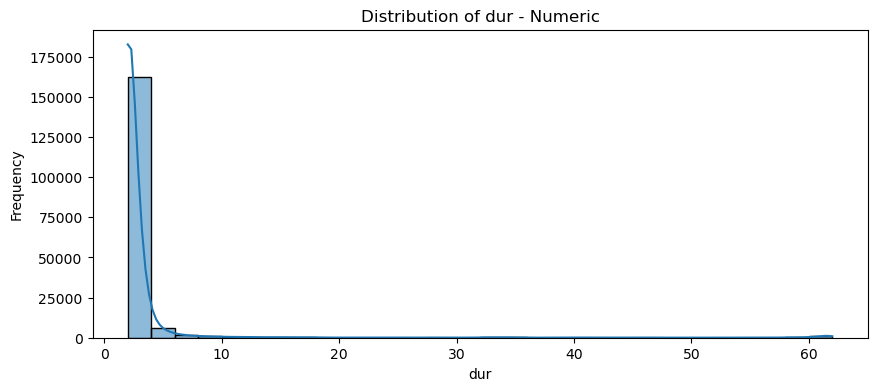

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


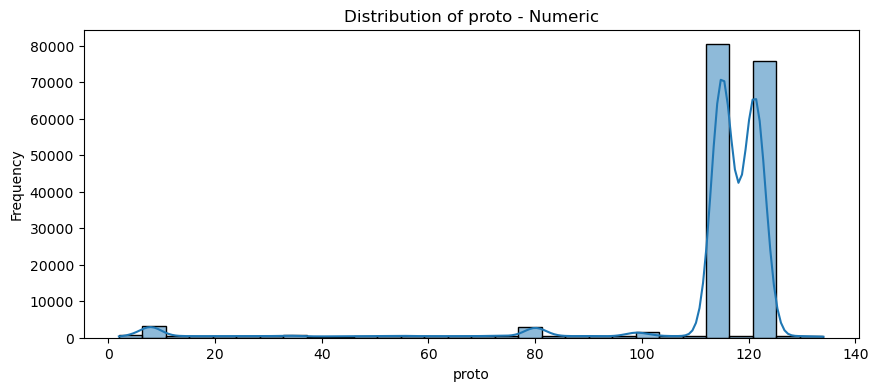

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


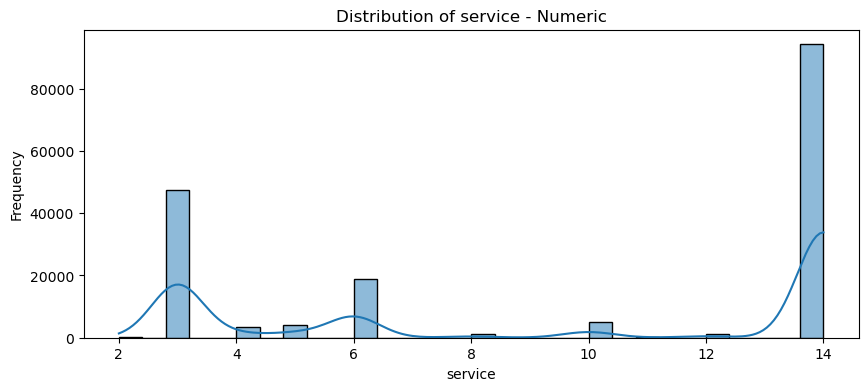

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


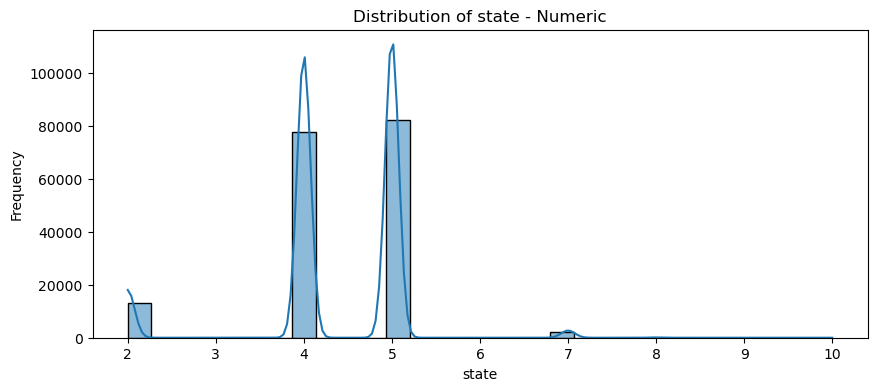

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


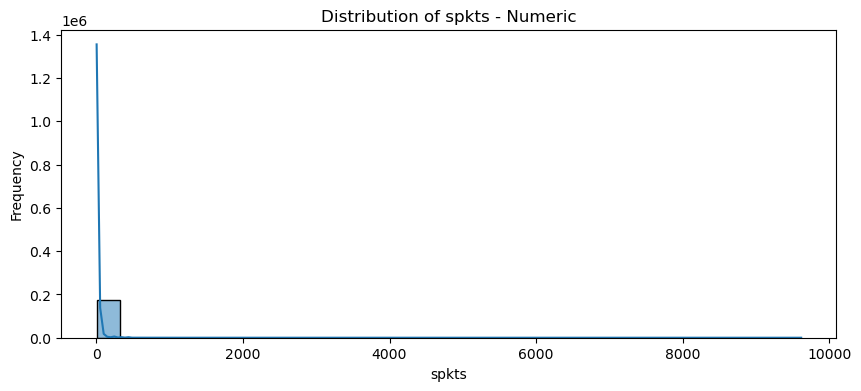

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


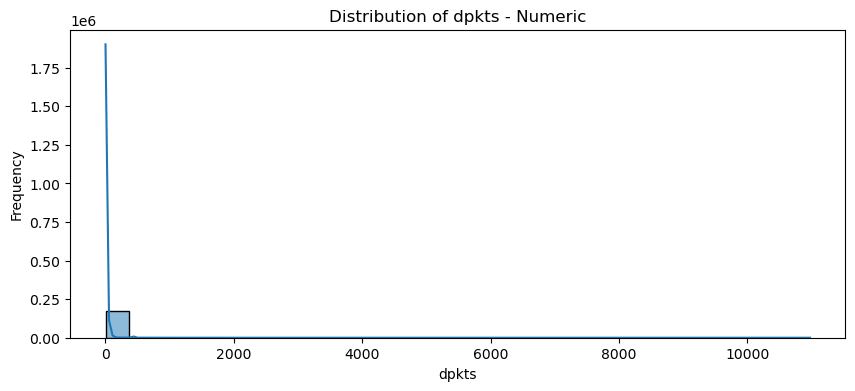

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


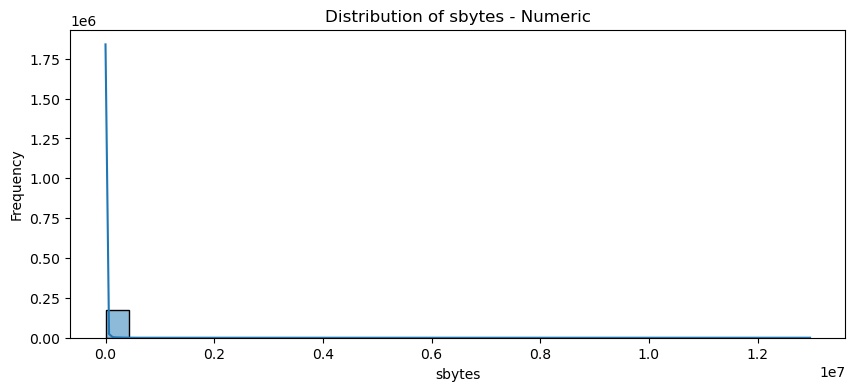

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


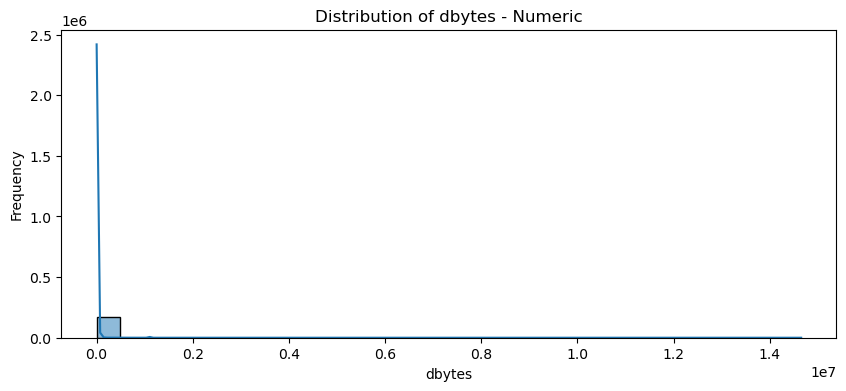

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


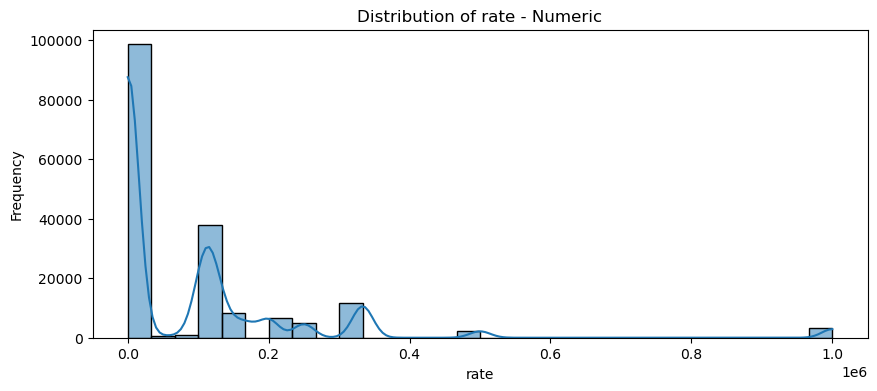

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


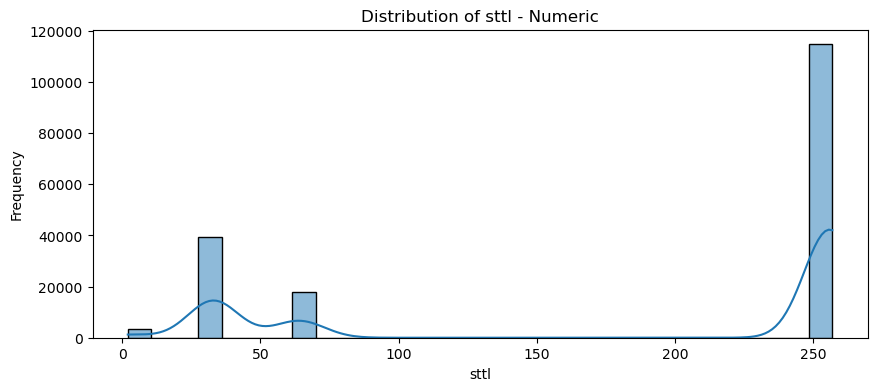

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


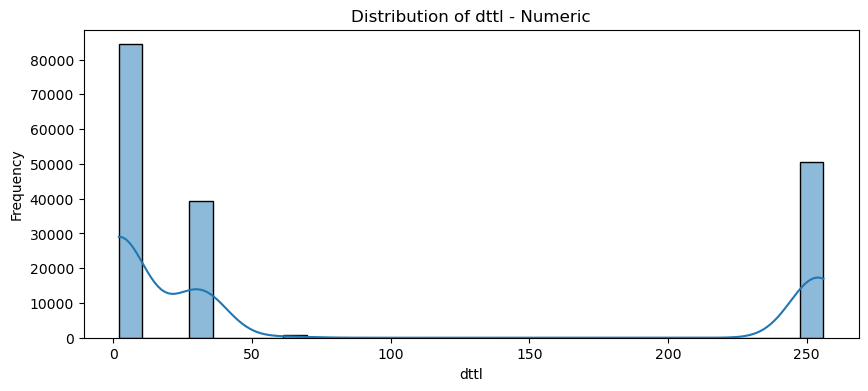

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


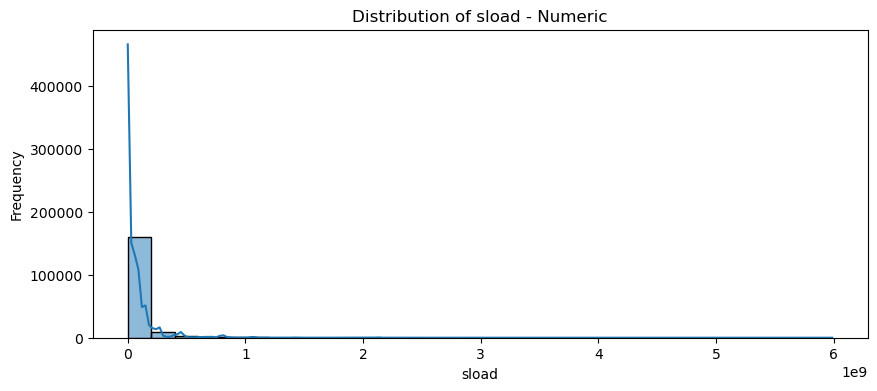

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


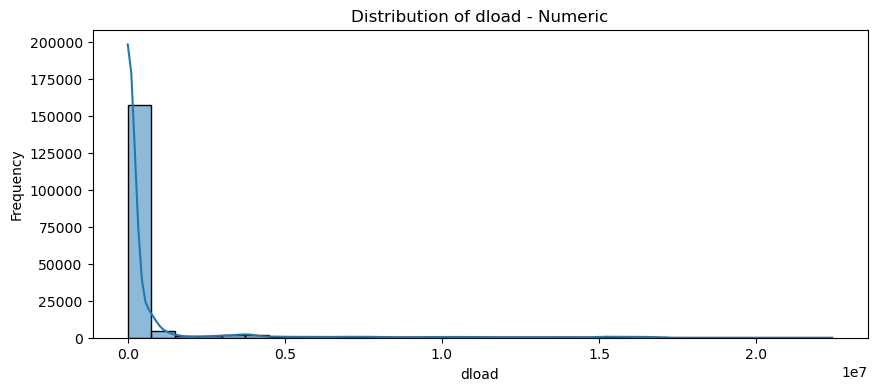

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


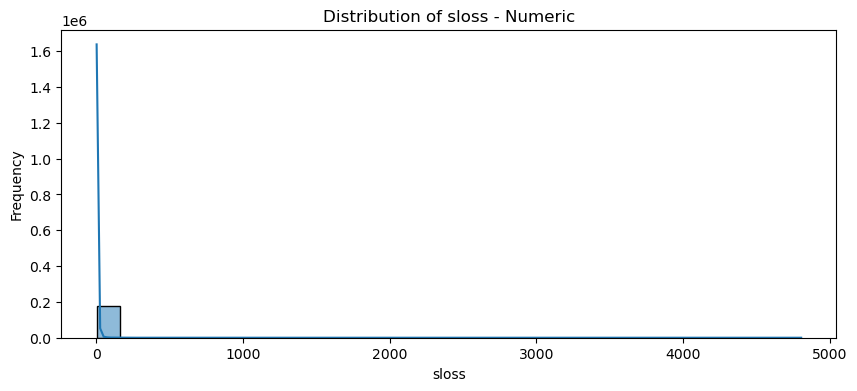

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


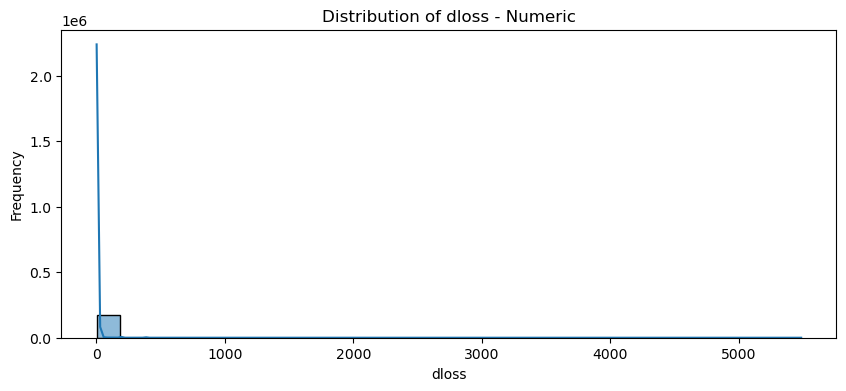

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


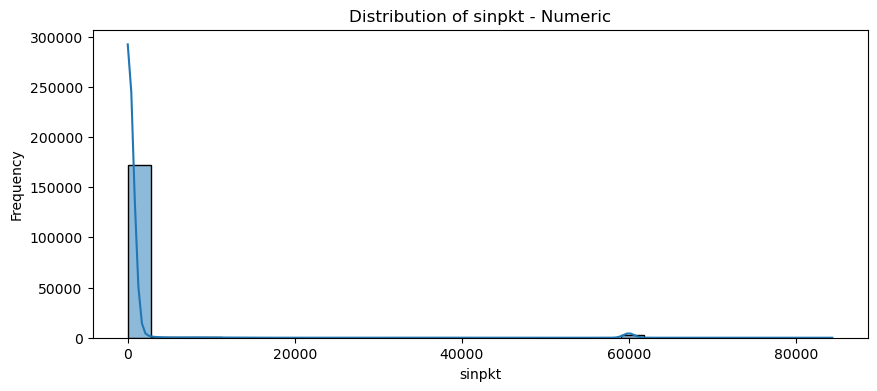

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


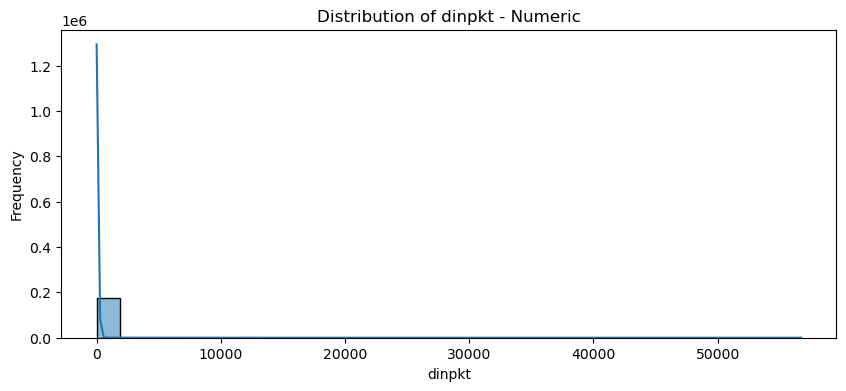

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


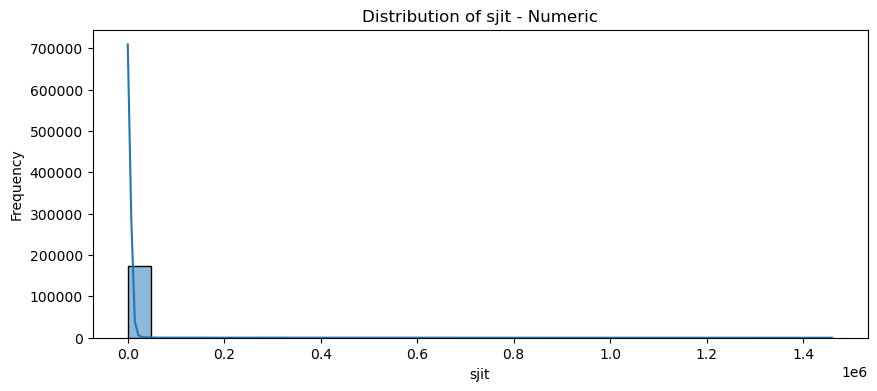

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


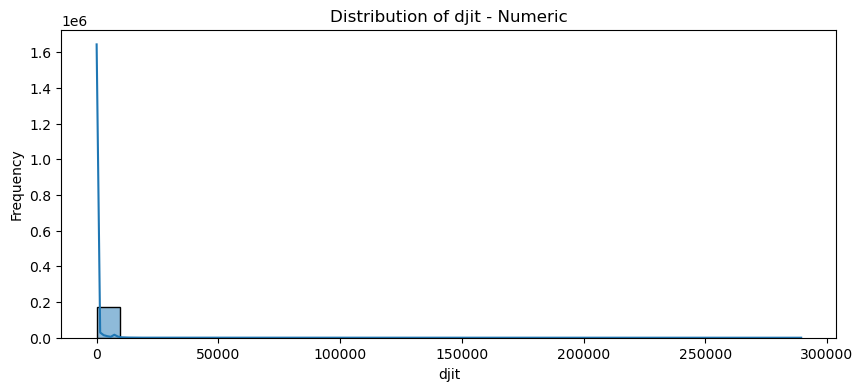

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


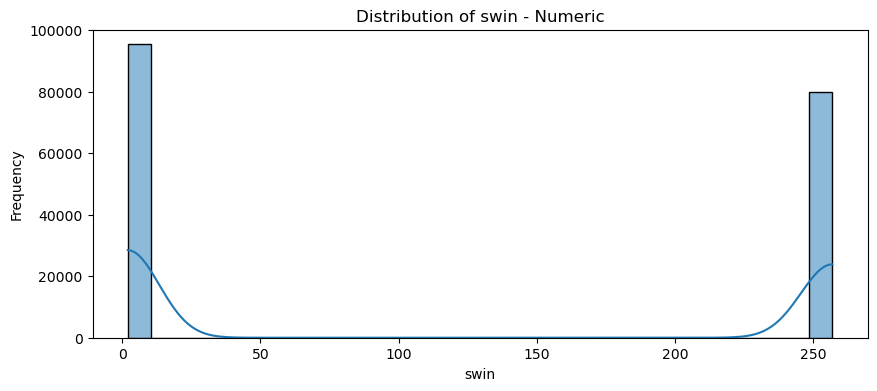

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


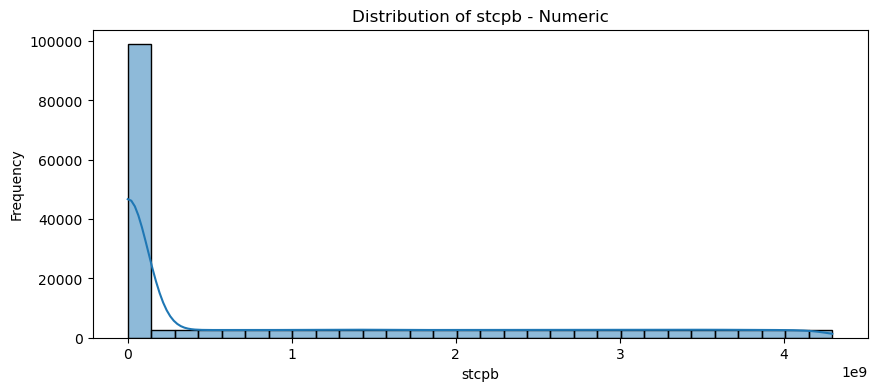

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


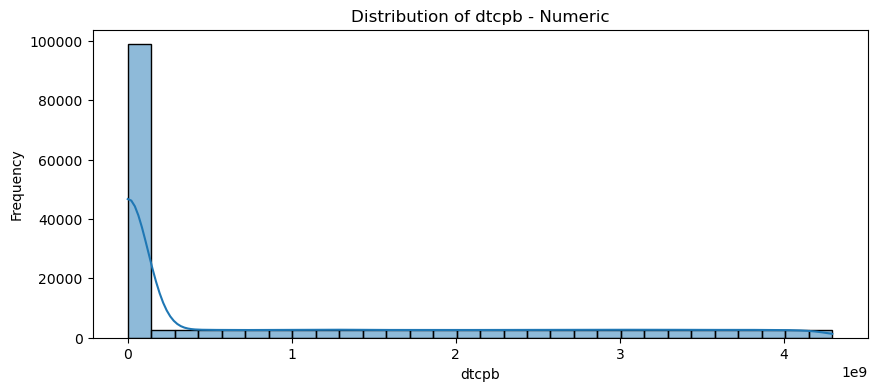

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


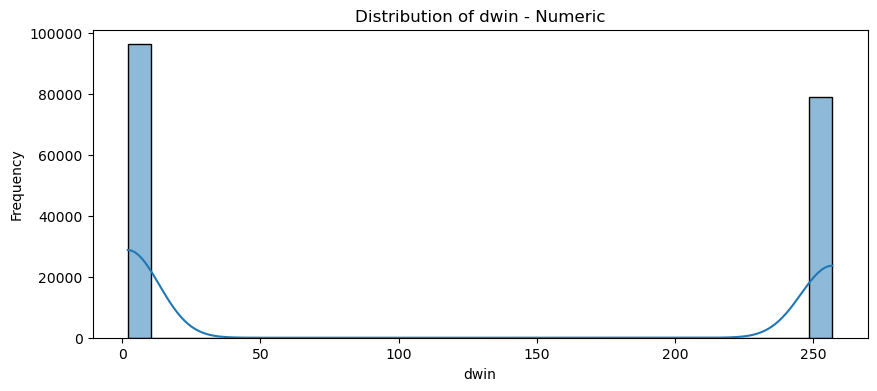

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


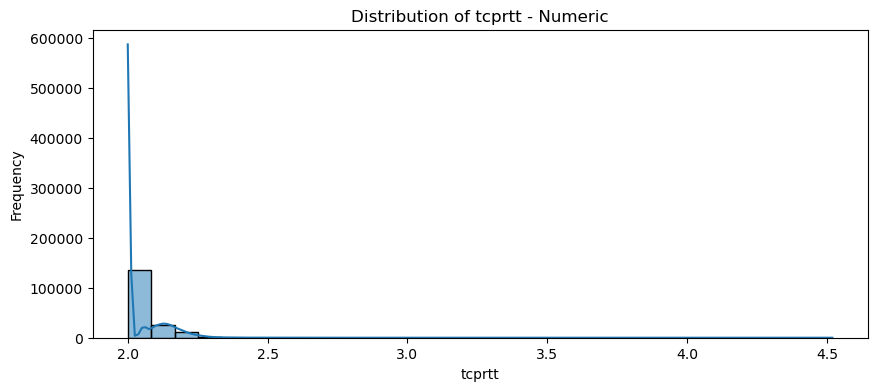

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


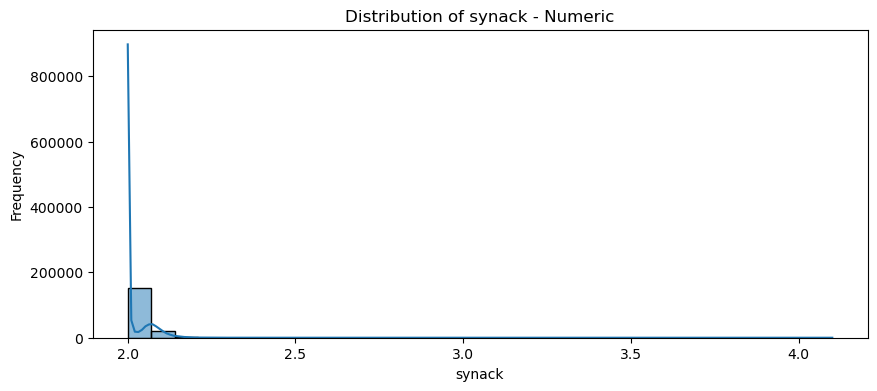

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


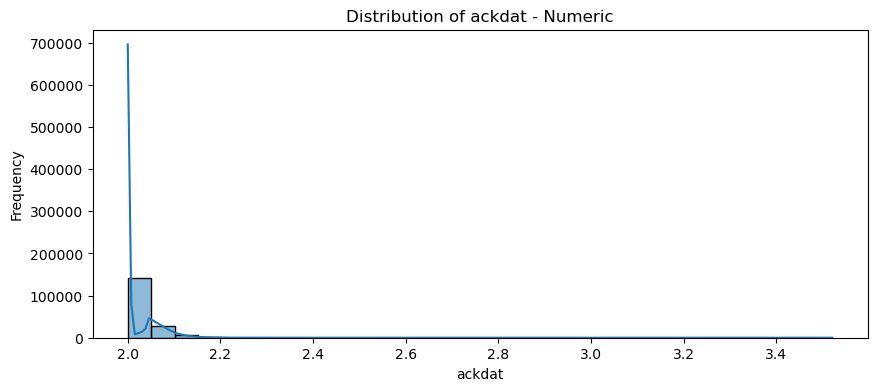

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


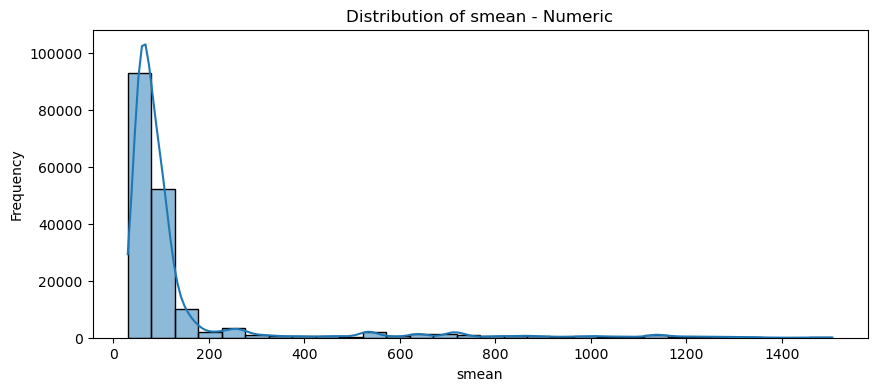

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


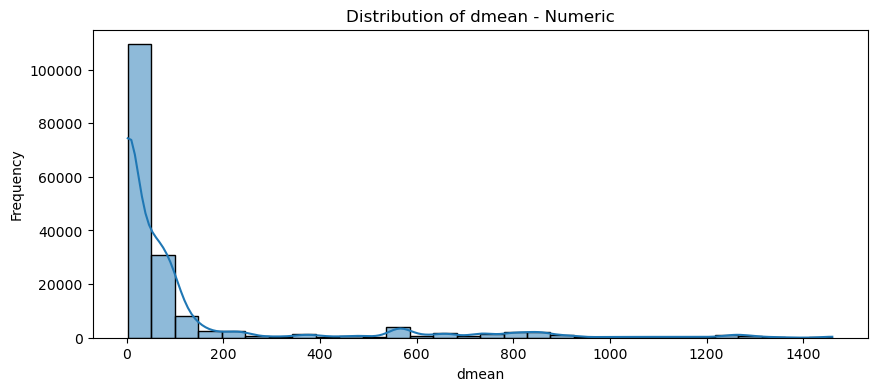

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


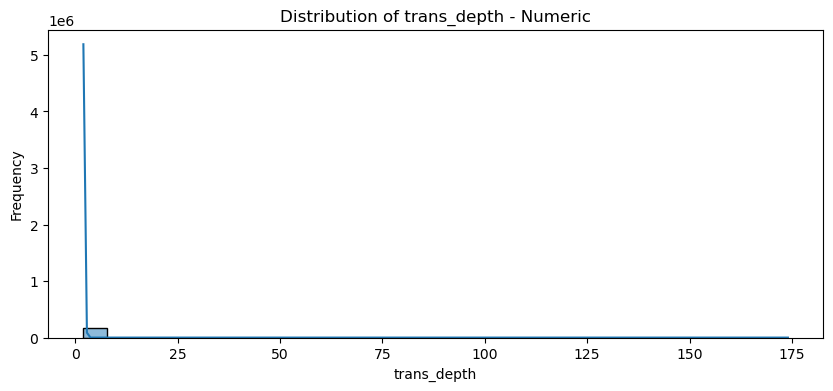

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


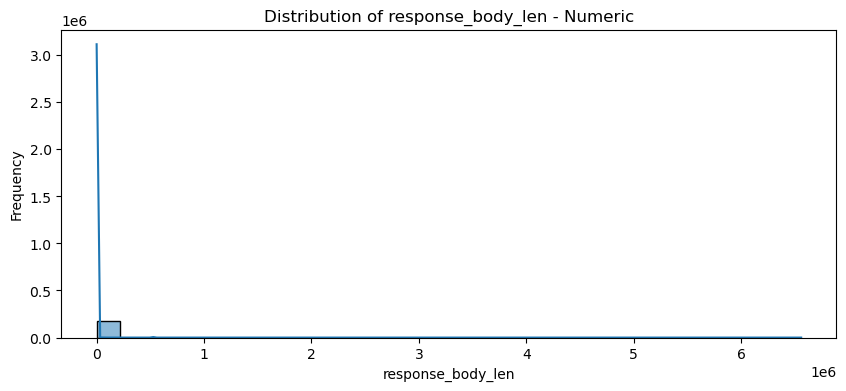

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


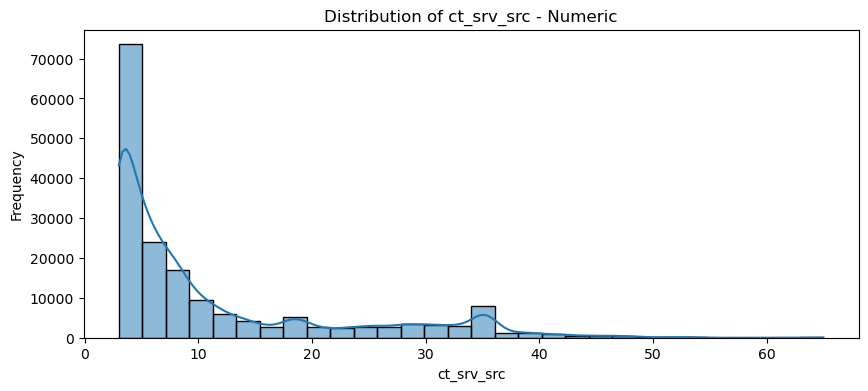

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


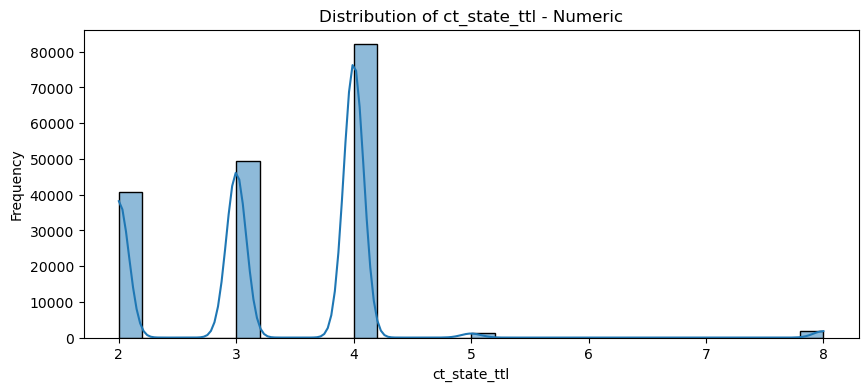

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


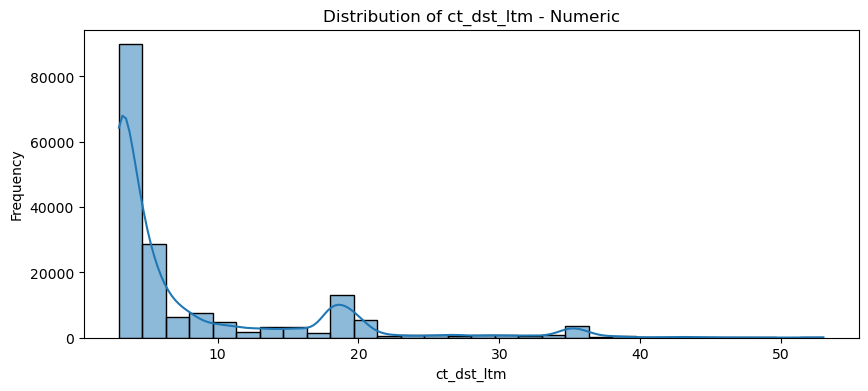

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


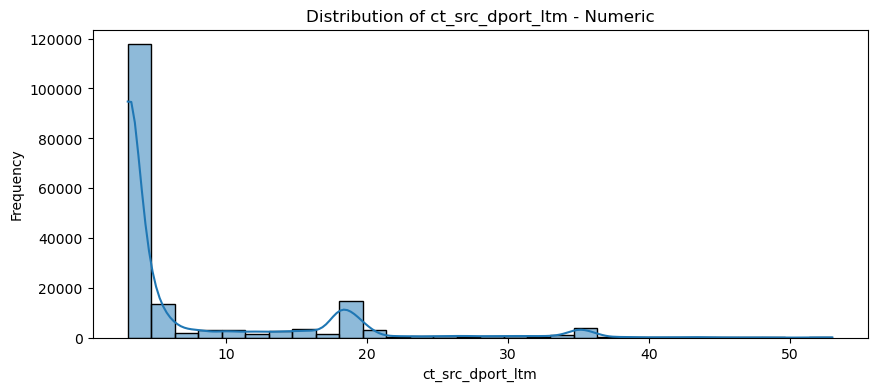

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


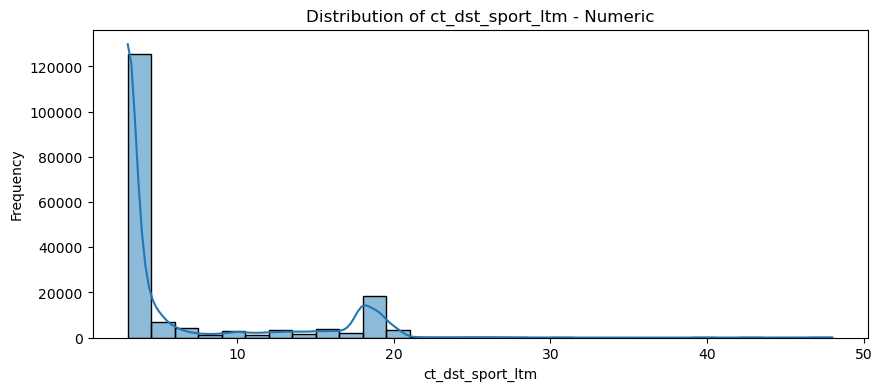

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


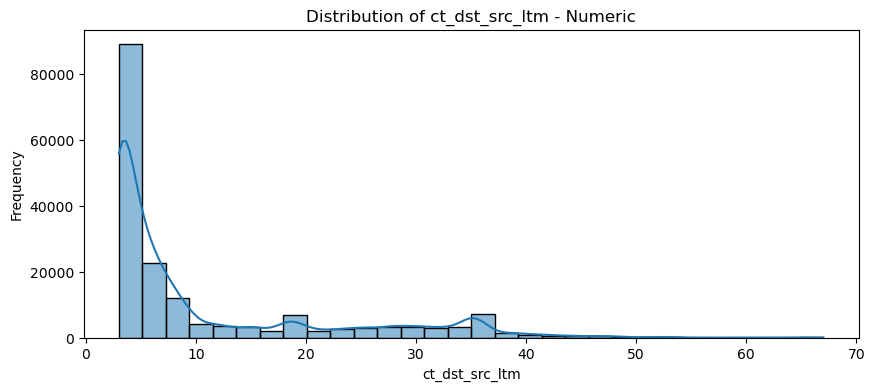

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


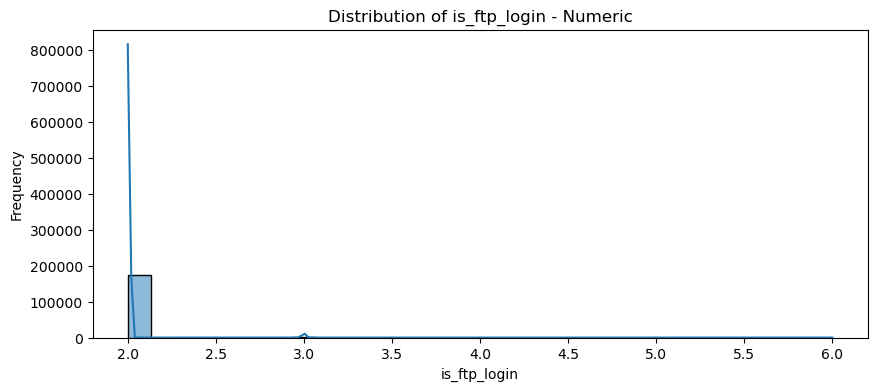

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


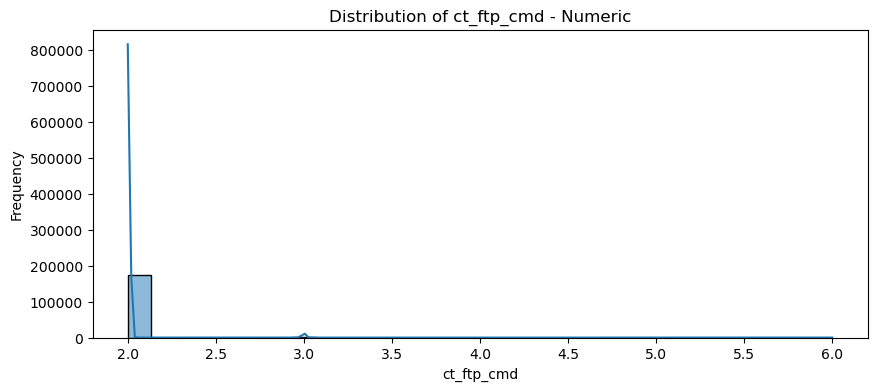

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


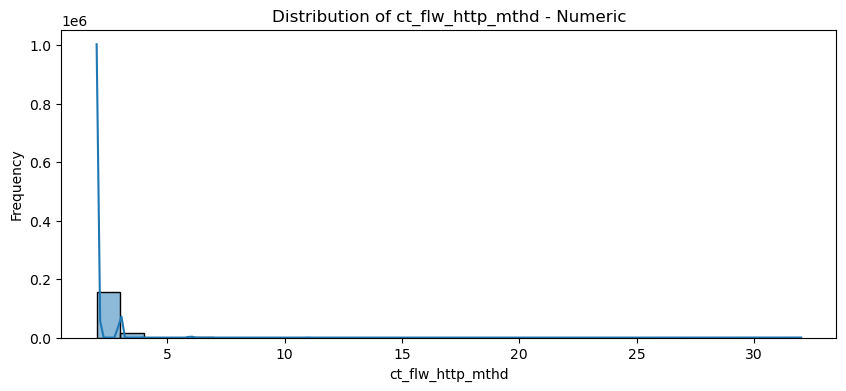

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


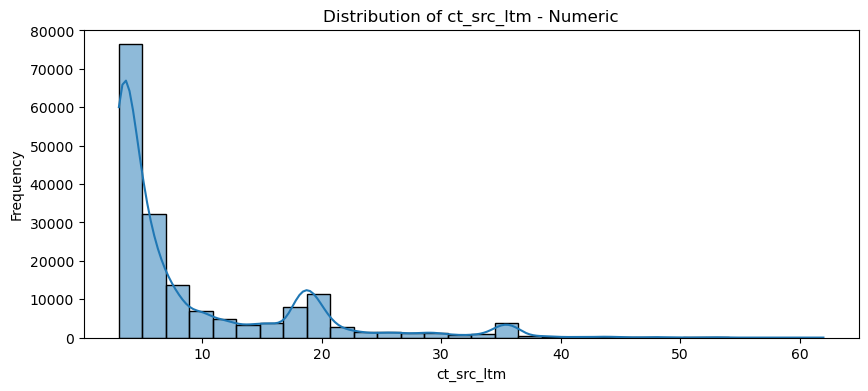

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


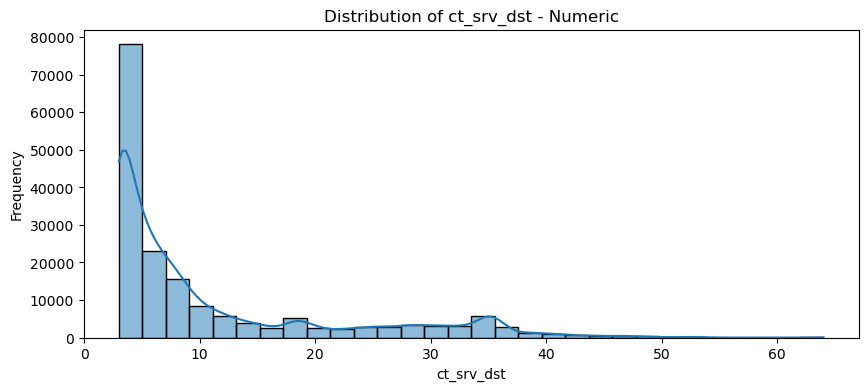

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


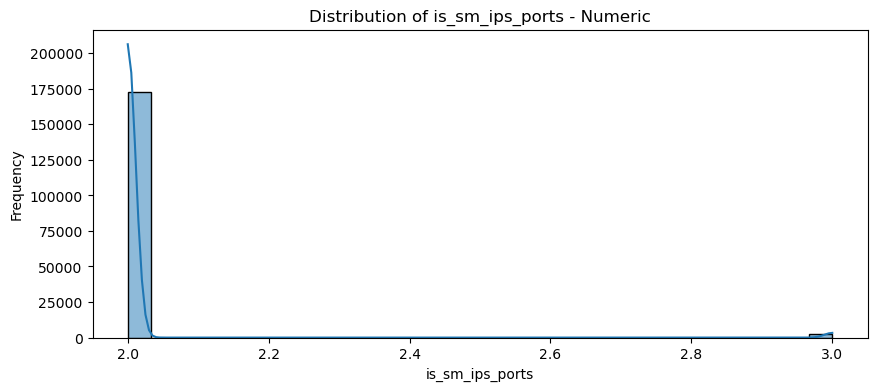

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


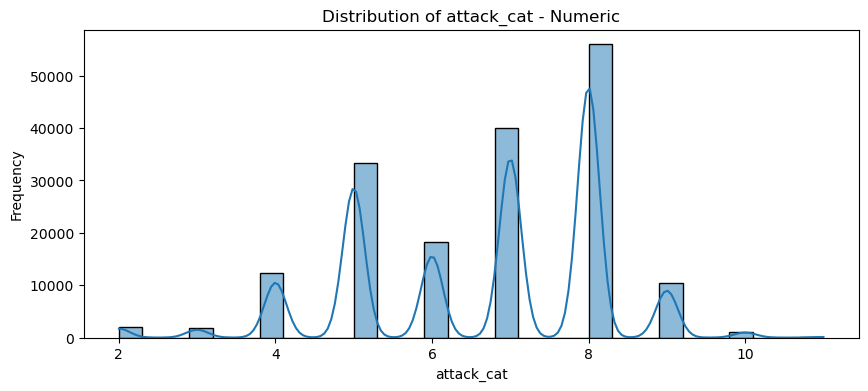

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


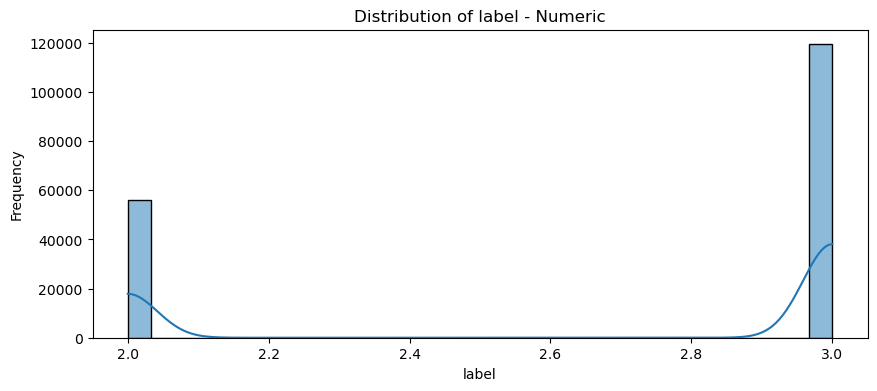

In [161]:
# Before log transformation
# representation of skewed data:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
# Iterate over each column in the DataFrame
for column in data_encoded.columns:
    plt.figure(figsize=(10, 4))
    # Check if the column is numeric or categorical
    if pd.api.types.is_numeric_dtype(data_encoded[column]):
        # Plot distribution of numeric columns
        sns.histplot(data_encoded[column], kde=True, bins=30)
        plt.title(f'Distribution of {column} - Numeric')
    else:
        # Plot count of categorical columns
        sns.countplot(y=column, data=data_encoded, order=data_encoded[column].value_counts().index)
        plt.title(f'Distribution of {column} - Categorical')

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [35]:
# normalization of the dataset into batches:

In [36]:
data1 = data.drop('attack_cat', axis = 1)

In [37]:
if 'attack_cat' in data_encoded.columns:
    y = data_encoded['attack_cat']  # or any other categorical columns
    data_encoded = data_encoded.drop(['attack_cat'], axis=1)  # Drop the categorical column
else:
    data_encoded = data_encoded

# performing normalization

In [38]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
data_encoded = data.copy()  # Assuming data is your DataFrame
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':  # Check if column contains categorical data
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# Now you can apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_encoded)
data_normalized = pd.DataFrame(data_normalized, columns=data_encoded.columns)


In [39]:
data_normalized

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,2.024634e-03,0.856061,1.000000,0.250,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,...,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.666667,0.0
1,1.083170e-02,0.856061,1.000000,0.250,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,...,0.000000,0.015625,0.00,0.00,0.0,0.000000,0.081967,0.0,0.666667,0.0
2,2.705215e-02,0.856061,1.000000,0.250,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,...,0.000000,0.031250,0.00,0.00,0.0,0.016949,0.081967,0.0,0.666667,0.0
3,2.802737e-02,0.856061,0.166667,0.250,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,...,0.000000,0.031250,0.25,0.25,0.0,0.016949,0.000000,0.0,0.666667,0.0
4,7.490901e-03,0.856061,1.000000,0.250,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,...,0.000000,0.609375,0.00,0.00,0.0,0.016949,0.622951,0.0,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,1.500000e-07,0.901515,0.083333,0.375,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,...,0.266667,0.359375,0.00,0.00,0.0,0.389831,0.377049,0.0,0.555556,1.0
175337,8.429368e-03,0.856061,1.000000,0.250,0.000936,0.000729,0.000046,0.000024,0.000034,0.996078,...,0.000000,0.015625,0.00,0.00,0.0,0.000000,0.000000,0.0,0.888889,1.0
175338,1.500000e-07,0.901515,0.083333,0.375,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,...,0.044444,0.187500,0.00,0.00,0.0,0.033898,0.180328,0.0,0.555556,1.0
175339,1.500000e-07,0.901515,0.083333,0.375,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,...,0.288889,0.453125,0.00,0.00,0.0,0.491525,0.475410,0.0,0.555556,1.0


In [66]:
# importing the necessary libraries:
from sklearn.preprocessing import StandardScaler

In [67]:
data_encoded.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('bool')], dtype=object)

In [68]:
scaler = StandardScaler()

# Declaring the batch size
batch_size = 100

# Compute the number of batches
n_batches = int(np.ceil(data_encoded.shape[0] / batch_size))

# Initializing a scaled DataFrame
scaled_features = pd.DataFrame(index=data_encoded.index, columns=data_encoded.columns)

# Scaling in batches
for i in range(n_batches):
    start_i = i * batch_size
    end_i = min(start_i + batch_size, data_encoded.shape[0])  # Adjust to not exceed the total number of rows

    # Selecting the batch
    data_encoded_batch = data_encoded.iloc[start_i:end_i]

    # Fitting the scaler on the first batch and transform, then only transform the rest
    if i == 0:
        scaler.fit(data_encoded_batch)

    # Applying the transformation
    data_encoded_scaled_batch = scaler.transform(data_encoded_batch)

    # Replacing the original data with the scaled data
    scaled_features.iloc[start_i:end_i] = data_encoded_scaled_batch


In [69]:
scaled_features

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,-0.280141,-0.33471,-0.342067,-0.265402,-0.239901,-0.527975,0.642806,0.866227,-0.512984,-0.233179,...,0.0,-0.204124,0.0,0.816497,-0.75,0.0,0.0,0.0,0.0,0.0
1,-0.227075,0.608135,3.433996,-0.189186,4.64474,-0.527907,-1.3023,0.850028,-0.513015,3.919719,...,0.0,-0.204124,0.0,0.816497,-0.75,0.0,0.0,0.0,0.0,0.0
2,-0.129341,-0.098999,0.990661,-0.248429,1.279355,-0.528903,-1.3023,0.850028,-0.513052,0.206657,...,0.0,-0.204124,0.0,0.816497,-0.75,0.0,0.0,0.0,0.0,0.0
3,-0.123464,0.372424,0.546418,-0.206158,-0.17009,-0.52891,-1.3023,0.850028,-0.513045,-0.276268,...,0.0,-0.204124,0.0,0.816497,-0.75,0.0,0.0,0.0,0.0,0.0
4,-0.247205,0.136713,-0.119946,-0.221209,-0.228694,-0.528605,0.663281,0.850028,-0.513014,-0.270997,...,0.0,-0.204124,0.0,0.816497,-0.75,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,-0.29234,-0.806133,-0.78631,-0.288459,-0.25998,1.191388,0.663281,-1.191012,-0.240204,-0.304442,...,0.0,-0.204124,0.0,-1.224745,1.333333,0.0,0.0,0.0,0.0,0.0
175337,-0.24155,0.136713,0.102176,-0.207439,-0.218654,-0.528602,0.663281,0.850028,-0.513013,-0.263309,...,0.0,-0.204124,0.0,0.816497,-0.75,0.0,0.0,0.0,0.0,0.0
175338,-0.29234,-0.806133,-0.78631,-0.288459,-0.25998,1.191388,0.663281,-1.191012,-0.240204,-0.304442,...,0.0,-0.204124,0.0,-1.224745,1.333333,0.0,0.0,0.0,0.0,0.0
175339,-0.29234,-0.806133,-0.78631,-0.288459,-0.25998,1.191388,0.663281,-1.191012,-0.240204,-0.304442,...,0.0,-0.204124,0.0,-1.224745,1.333333,0.0,0.0,0.0,0.0,0.0


In [70]:
y.unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

# performing outlier testing on a part of 'data':

In [71]:
# applying log transformation:

In [40]:
# Adding a small constant if there are zeros in the dataset
data_encoded += 1

# Apply log transformation
data_encoded_log = np.log1p(data_normalized)


# Checking for infinite values
if np.isinf(data_encoded_log).any().any():
    print("Infinite values detected")


data_encoded_log.replace(-np.inf, np.nan, inplace=True)
# You can then impute the NaN values or remove those rows.


In [41]:
data_encoded

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1.121478,114,13,3,7,5,259,173,75.087490,253,...,2,2,1,1,1,2,2,1,7,1
1,1.649902,114,13,3,15,39,735,42015,79.473372,63,...,2,3,1,1,1,2,7,1,7,1
2,2.623129,114,13,3,9,17,365,13187,15.170161,63,...,2,4,1,1,1,3,7,1,7,1
3,2.681642,114,3,3,13,13,629,771,14.677108,63,...,2,4,2,2,1,3,2,1,7,1
4,1.449454,114,13,3,11,7,535,269,34.373826,255,...,2,41,1,1,1,3,40,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,1.000009,120,2,4,3,1,115,1,111112.107200,255,...,14,25,1,1,1,25,25,1,6,2
175337,1.505762,114,13,3,11,9,621,355,34.612649,255,...,2,3,1,1,1,2,2,1,9,2
175338,1.000009,120,2,4,3,1,115,1,111112.107200,255,...,4,14,1,1,1,4,13,1,6,2
175339,1.000009,120,2,4,3,1,115,1,111112.107200,255,...,15,31,1,1,1,31,31,1,6,2


In [42]:
data_encoded_log

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,2.022587e-03,0.618456,0.693147,0.223144,0.000520,0.000364,0.000018,0.000012,0.000074,0.687247,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.510826,0.000000
1,1.077346e-02,0.618456,0.693147,0.223144,0.001351,0.003457,0.000054,0.002863,0.000078,0.217638,...,0.000000,0.015504,0.000000,0.000000,0.0,0.000000,0.078781,0.0,0.510826,0.000000
2,2.669271e-02,0.618456,0.693147,0.223144,0.000728,0.001457,0.000026,0.000899,0.000014,0.217638,...,0.000000,0.030772,0.000000,0.000000,0.0,0.016807,0.078781,0.0,0.510826,0.000000
3,2.764179e-02,0.618456,0.154151,0.223144,0.001143,0.001093,0.000046,0.000053,0.000014,0.217638,...,0.000000,0.030772,0.223144,0.223144,0.0,0.016807,0.000000,0.0,0.510826,0.000000
4,7.462984e-03,0.618456,0.693147,0.223144,0.000936,0.000547,0.000039,0.000018,0.000033,0.691184,...,0.000000,0.475846,0.000000,0.000000,0.0,0.016807,0.484246,0.0,0.510826,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,1.500000e-07,0.642651,0.080043,0.318454,0.000104,0.000000,0.000007,0.000000,0.105361,0.691184,...,0.236389,0.307025,0.000000,0.000000,0.0,0.329182,0.319943,0.0,0.441833,0.693147
175337,8.394039e-03,0.618456,0.693147,0.223144,0.000936,0.000729,0.000046,0.000024,0.000034,0.691184,...,0.000000,0.015504,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.635989,0.693147
175338,1.500000e-07,0.642651,0.080043,0.318454,0.000104,0.000000,0.000007,0.000000,0.105361,0.691184,...,0.043485,0.171850,0.000000,0.000000,0.0,0.033336,0.165792,0.0,0.441833,0.693147
175339,1.500000e-07,0.642651,0.080043,0.318454,0.000104,0.000000,0.000007,0.000000,0.105361,0.691184,...,0.253781,0.373716,0.000000,0.000000,0.0,0.399799,0.388936,0.0,0.441833,0.693147


C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


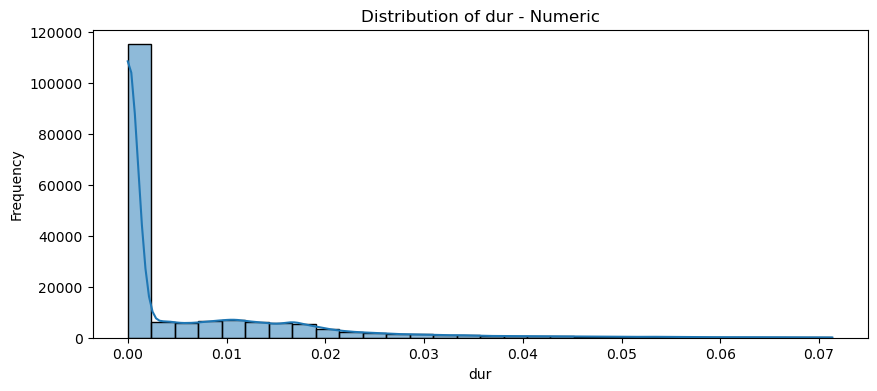

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


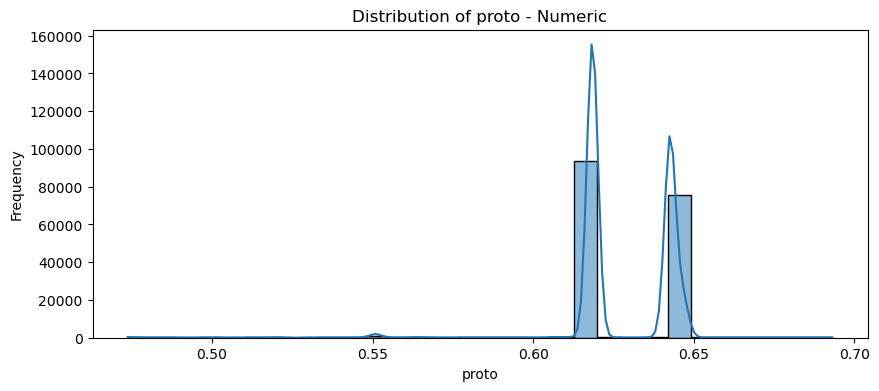

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


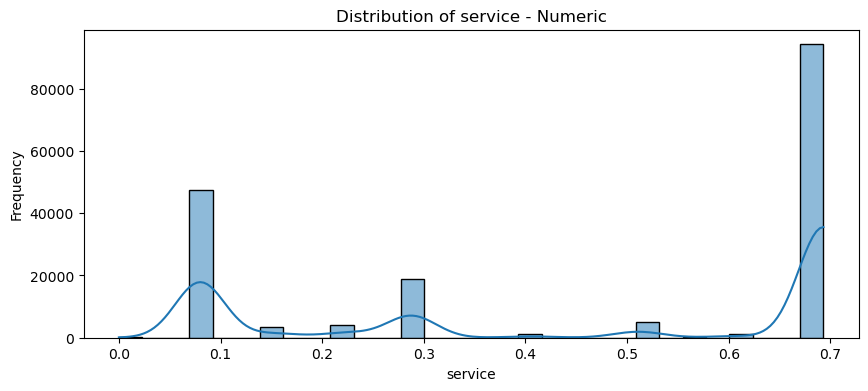

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


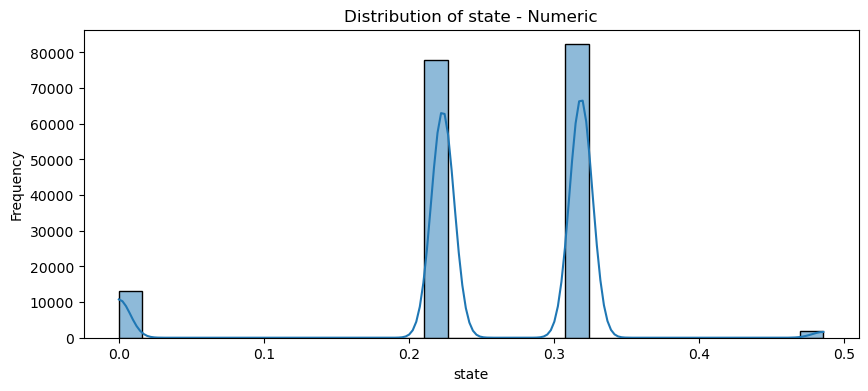

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


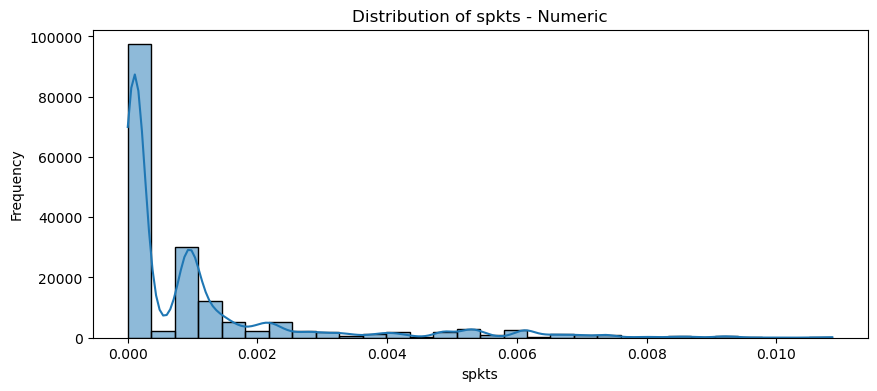

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


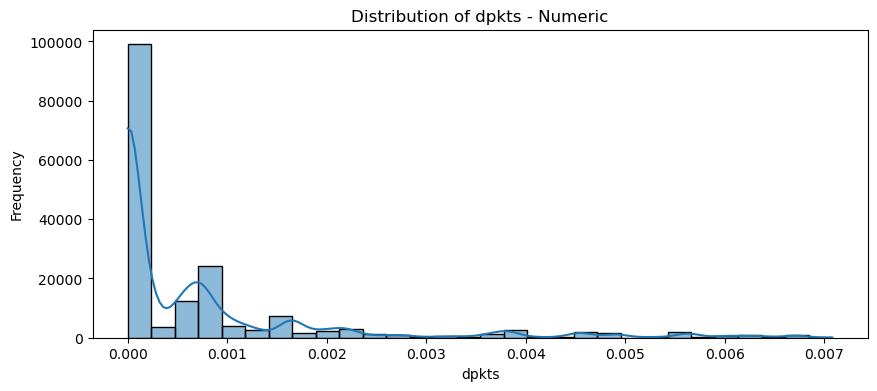

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


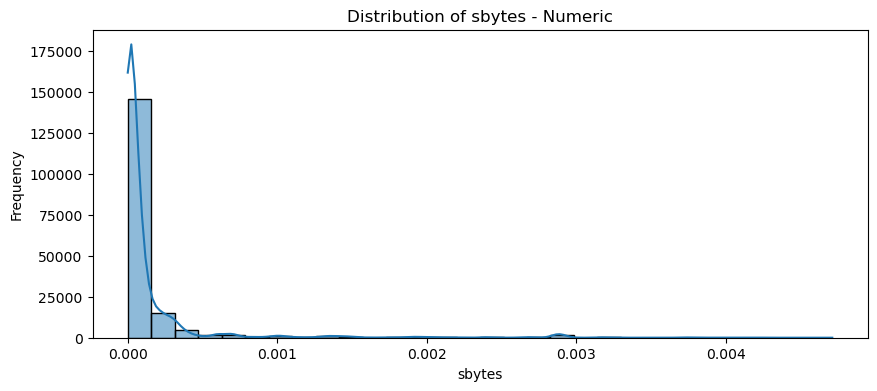

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


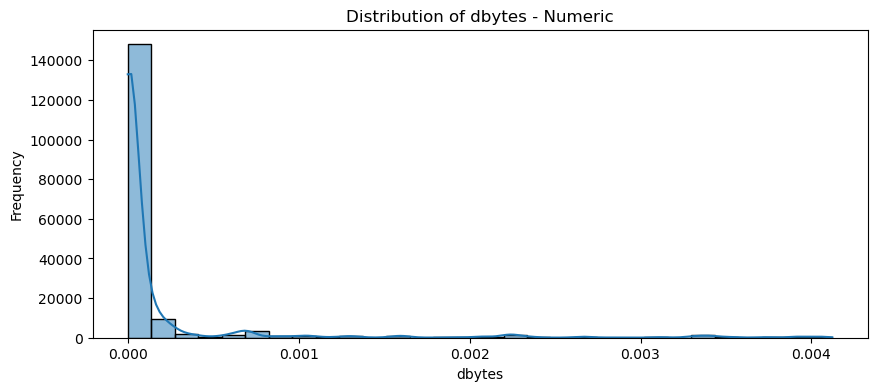

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


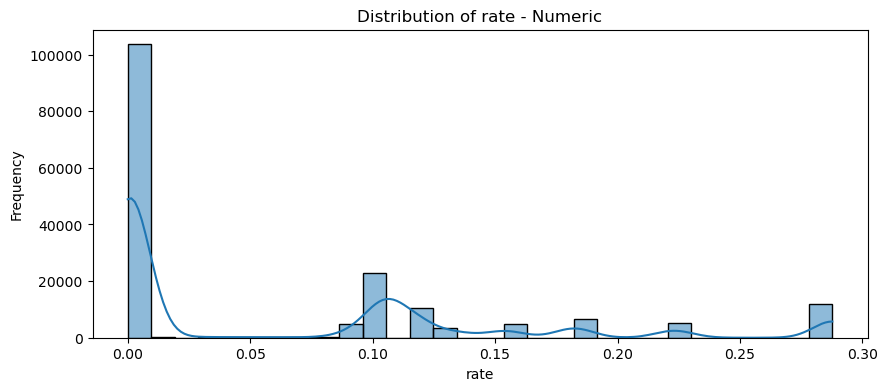

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


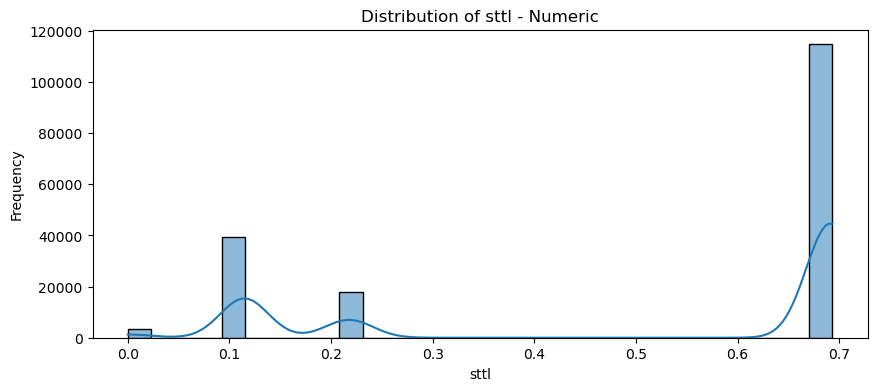

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


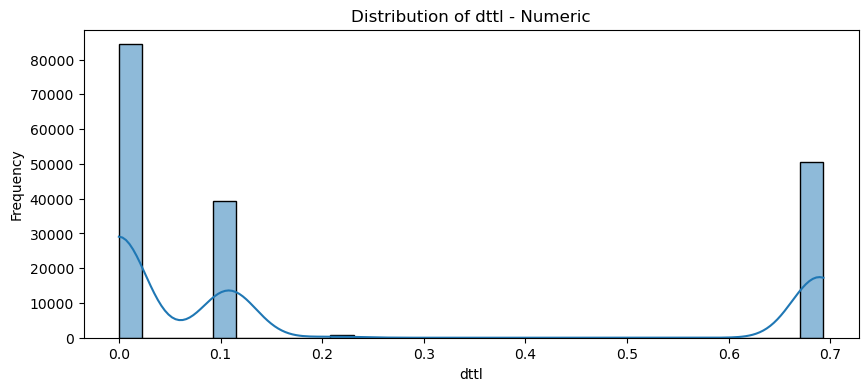

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


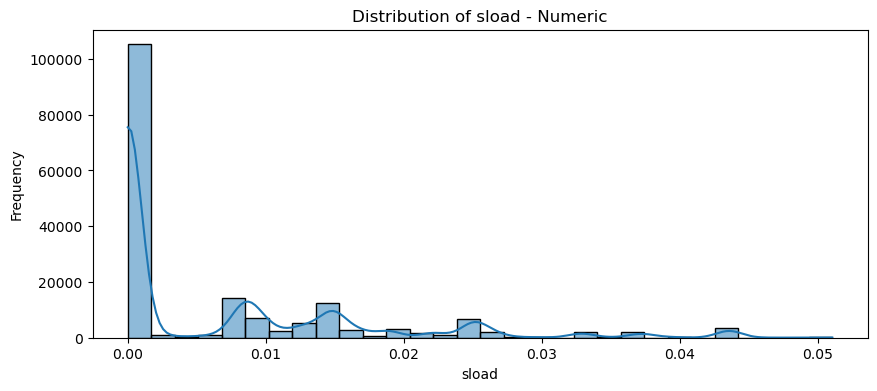

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


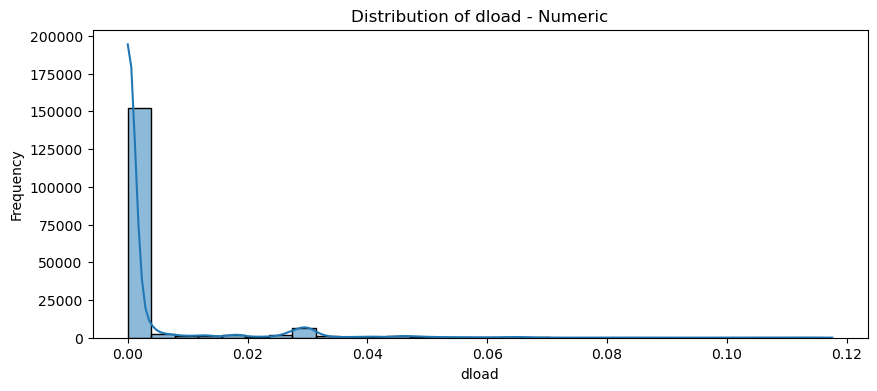

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


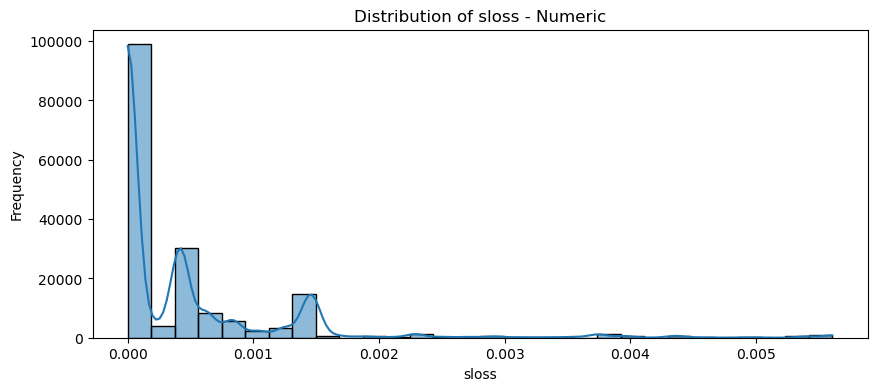

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


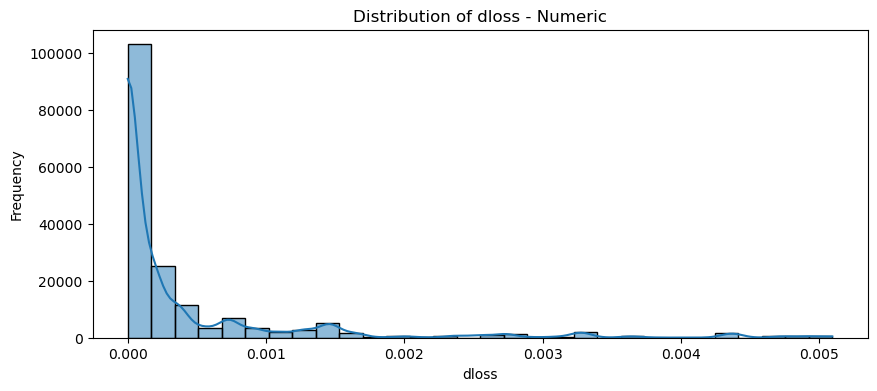

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


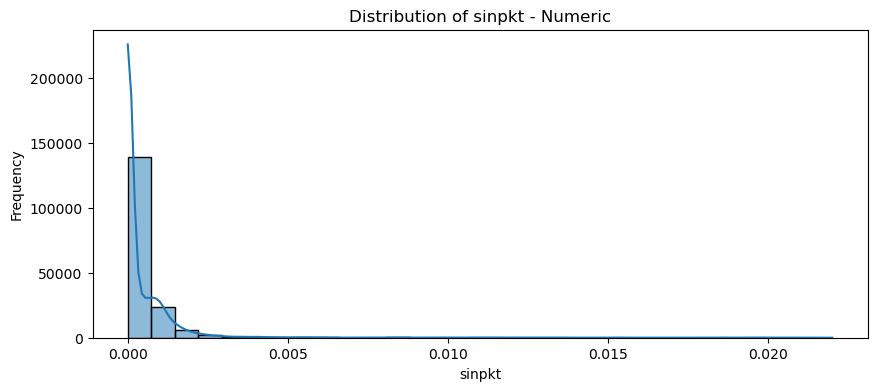

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


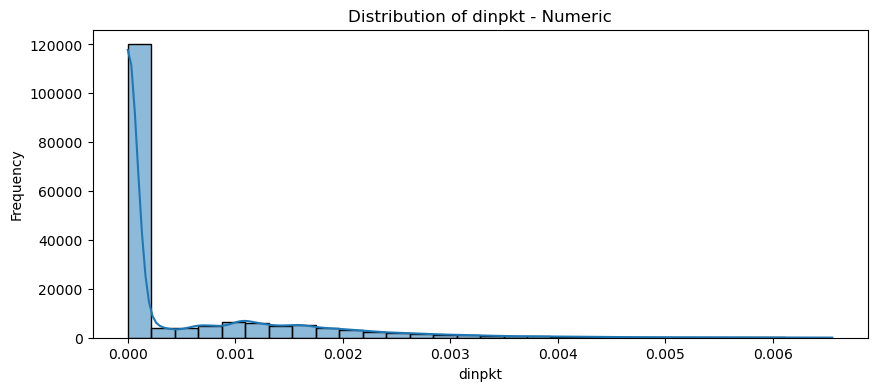

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


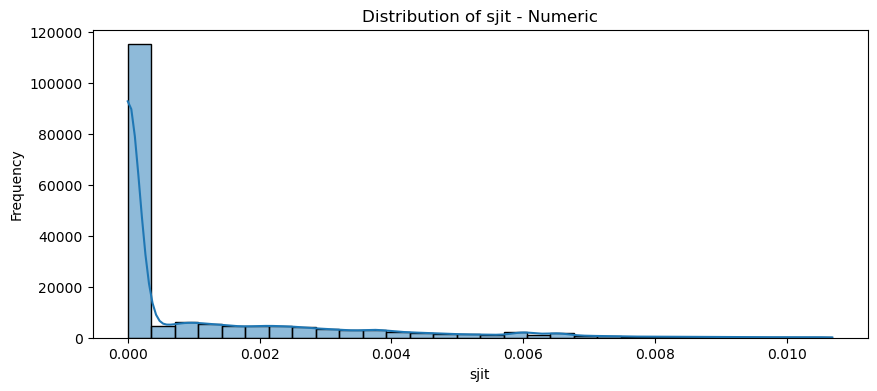

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


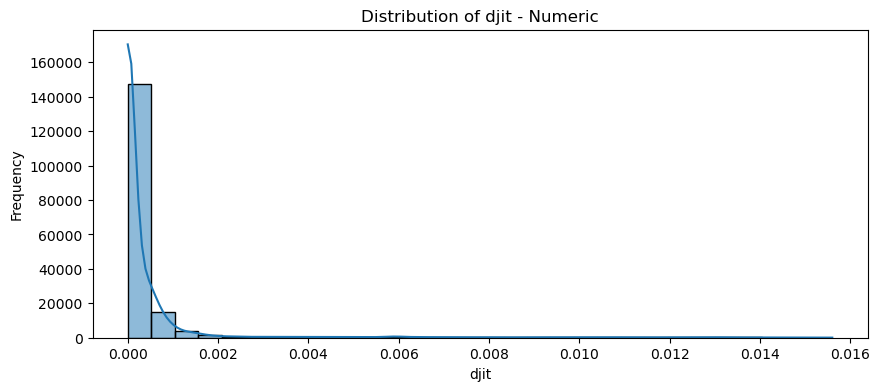

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


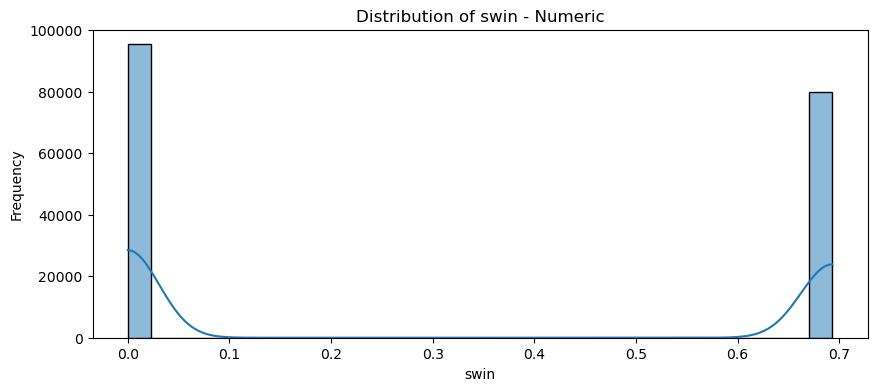

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


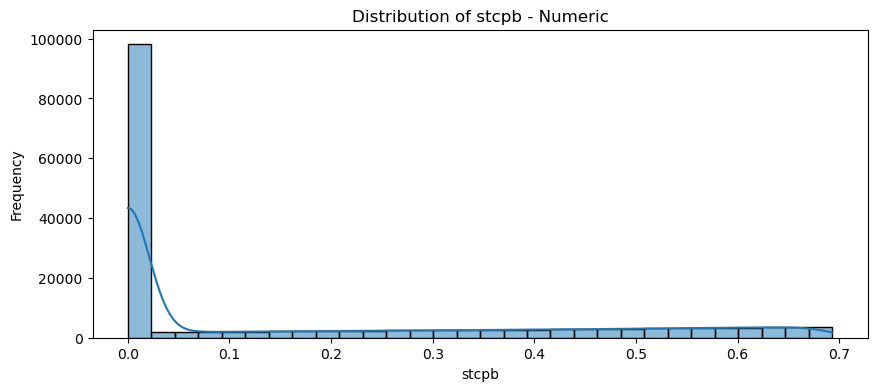

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


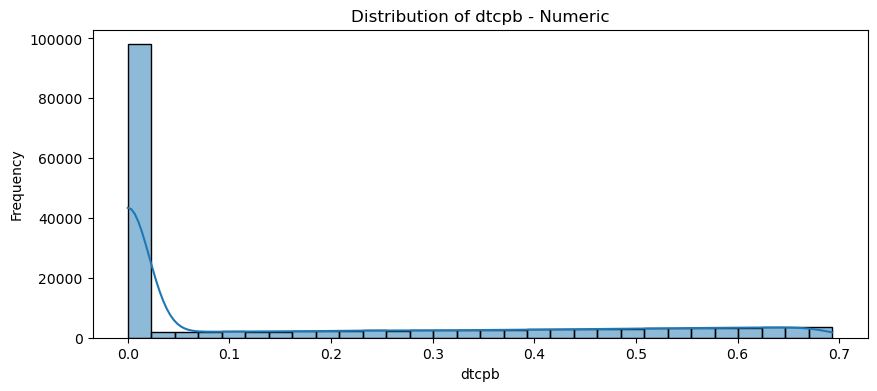

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


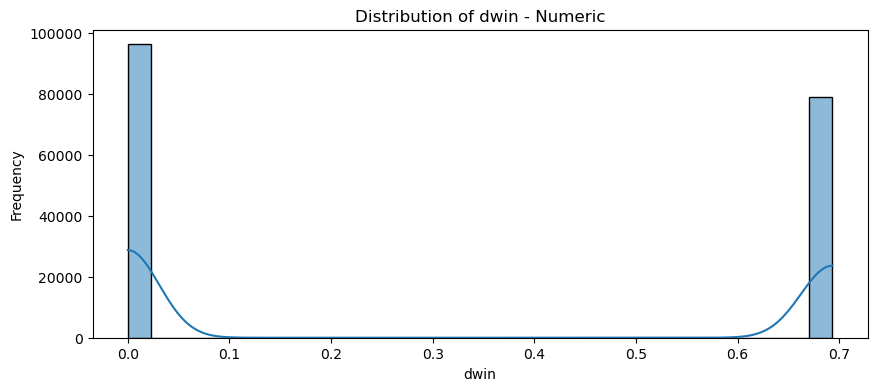

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


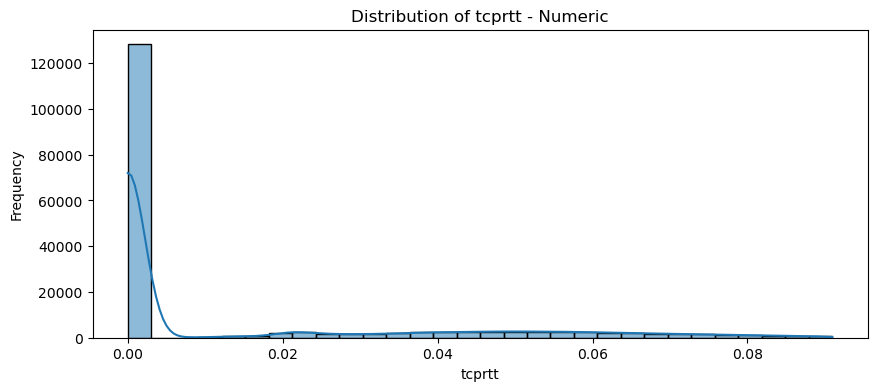

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


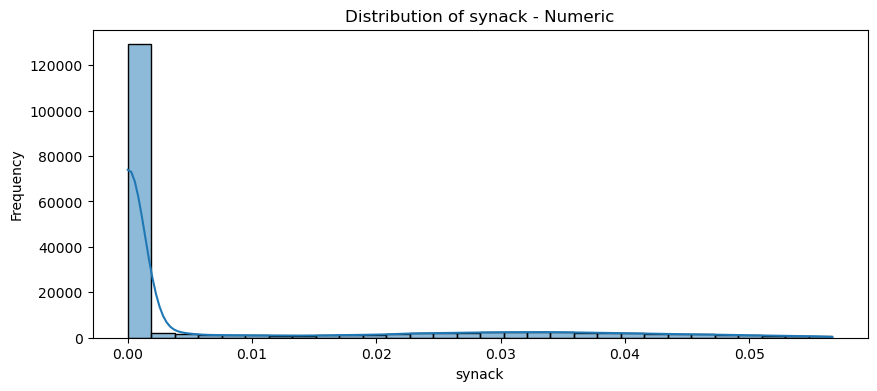

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


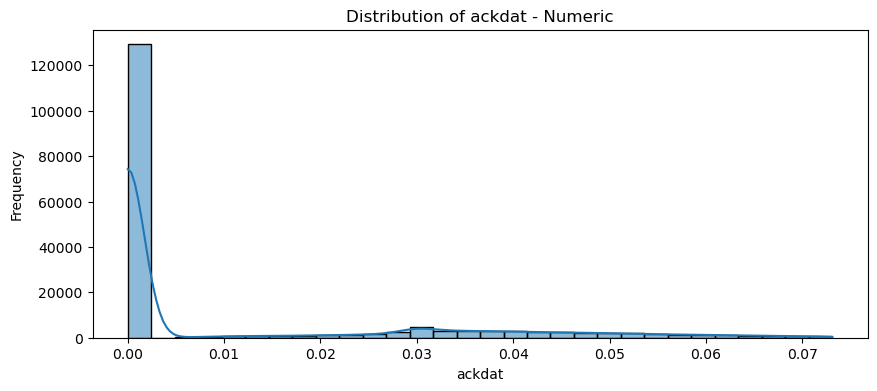

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


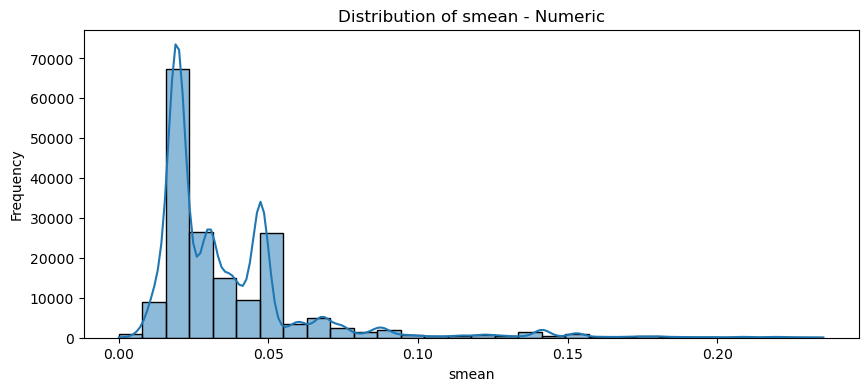

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


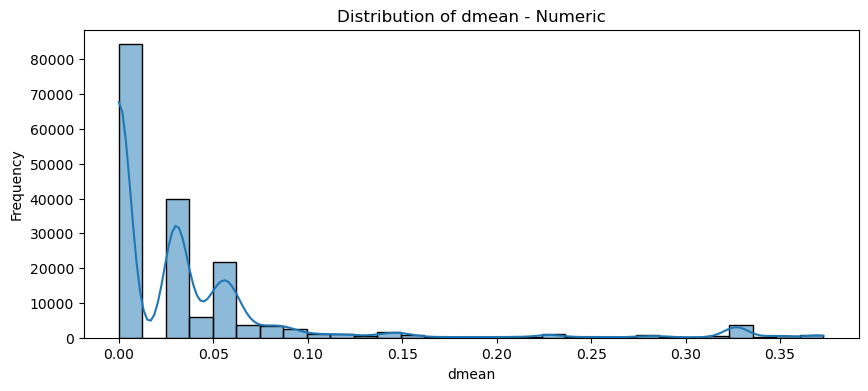

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


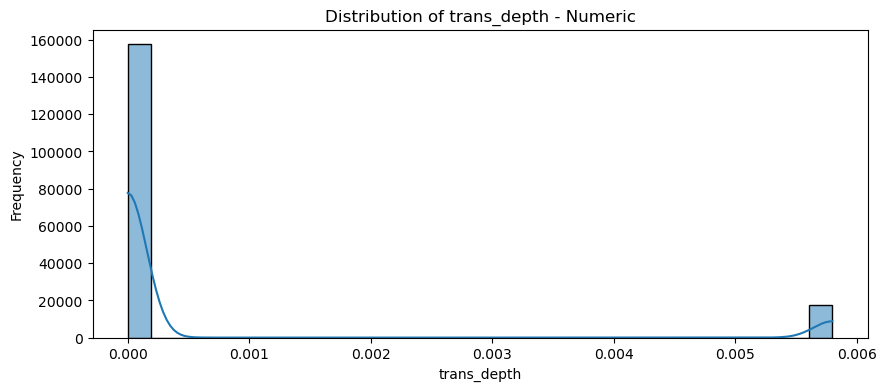

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


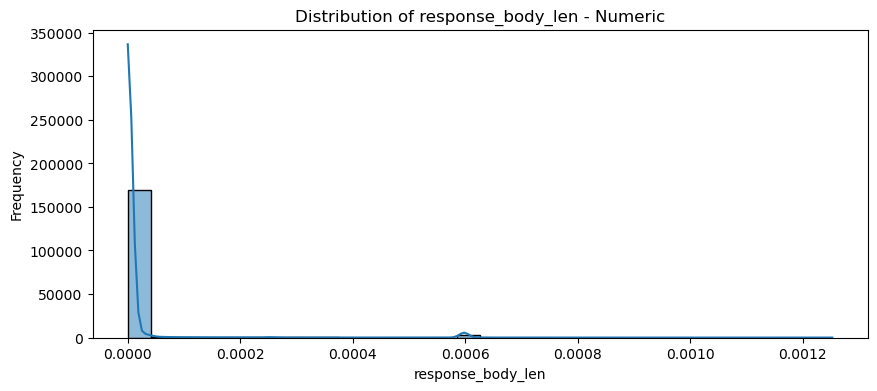

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


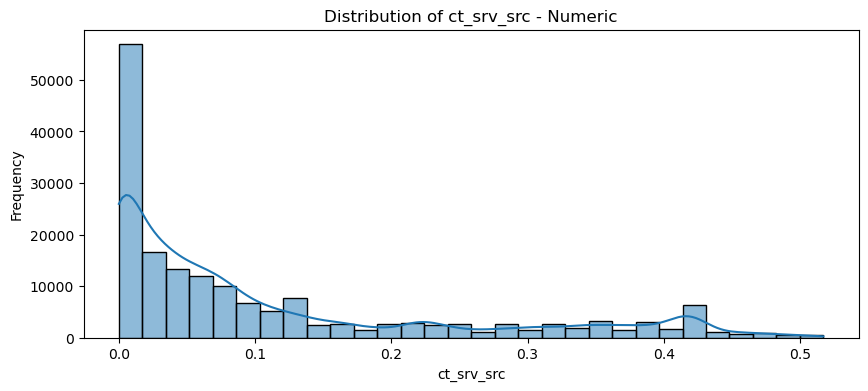

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


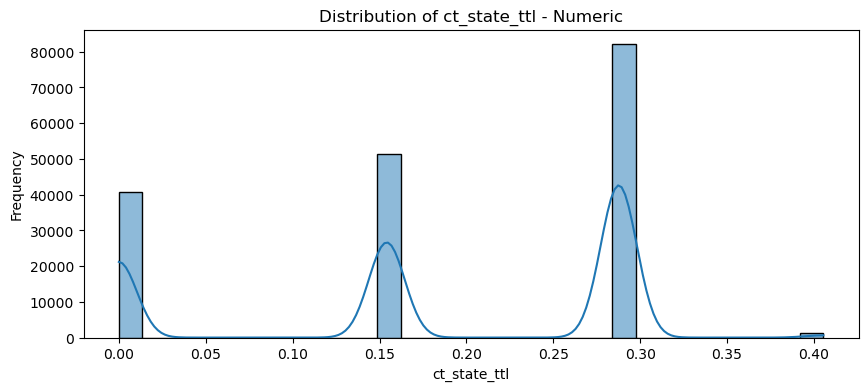

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


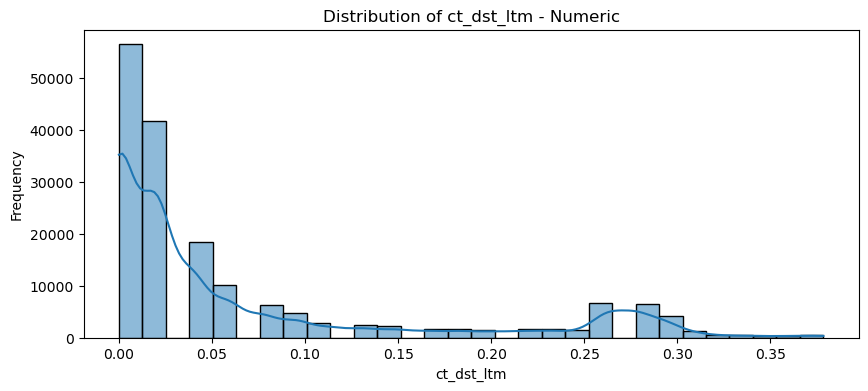

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


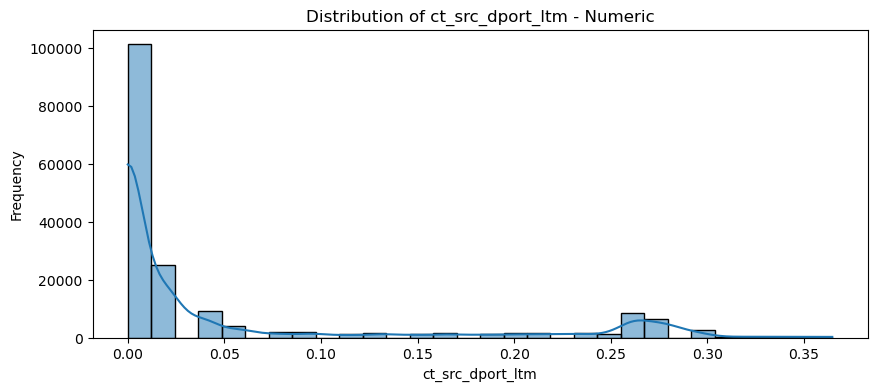

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


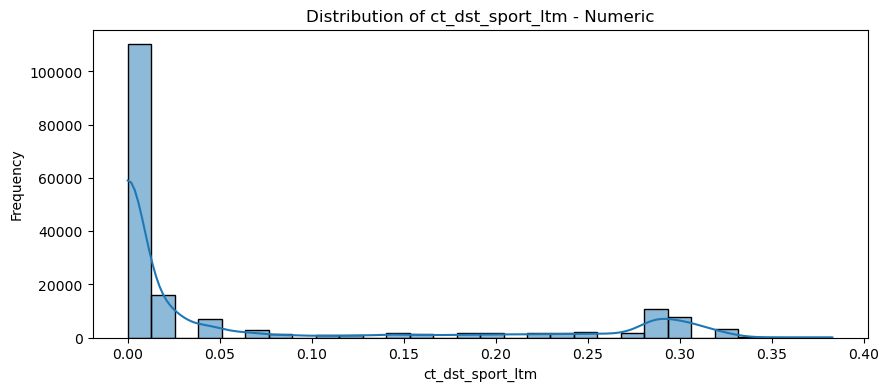

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


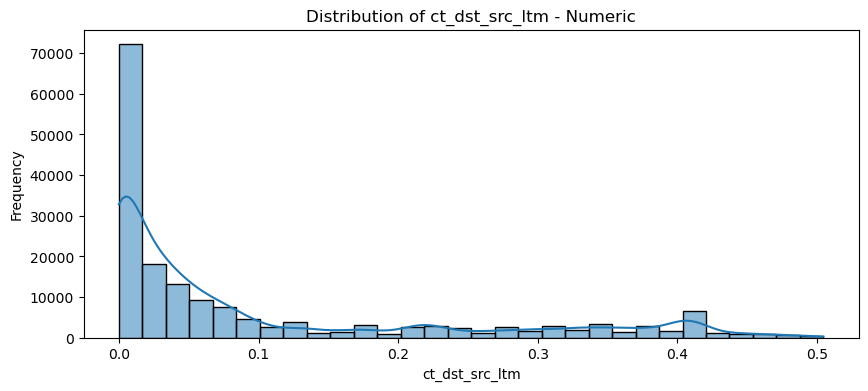

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


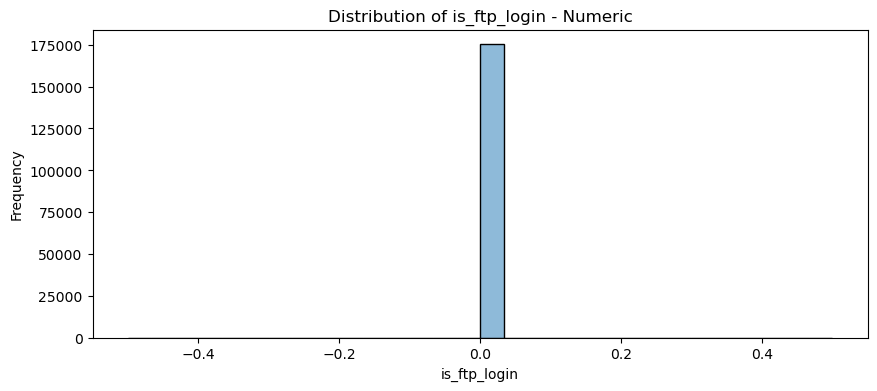

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


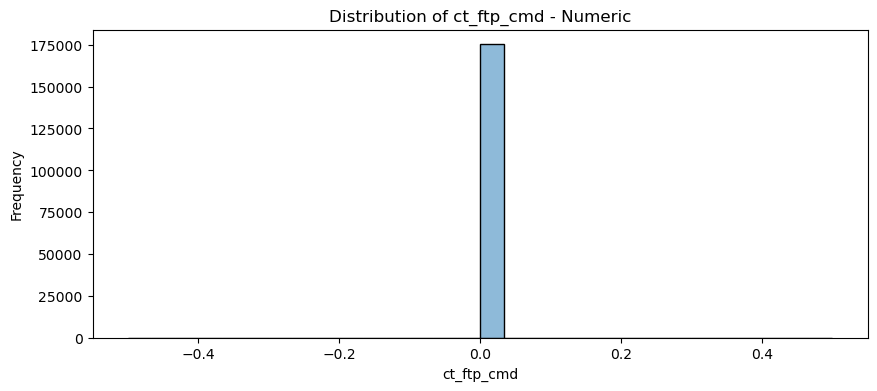

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


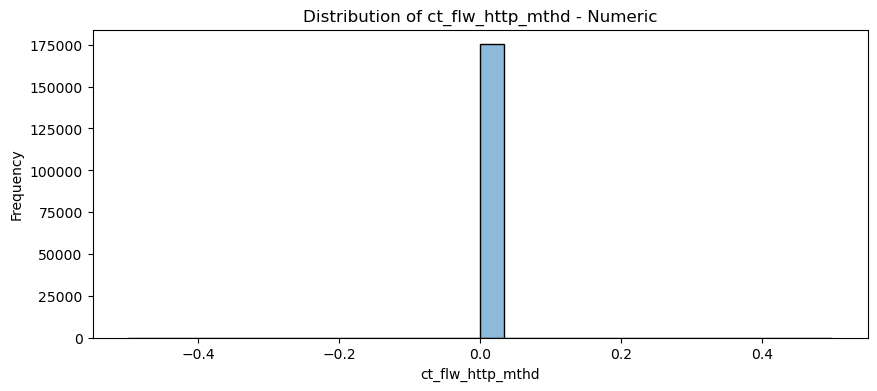

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


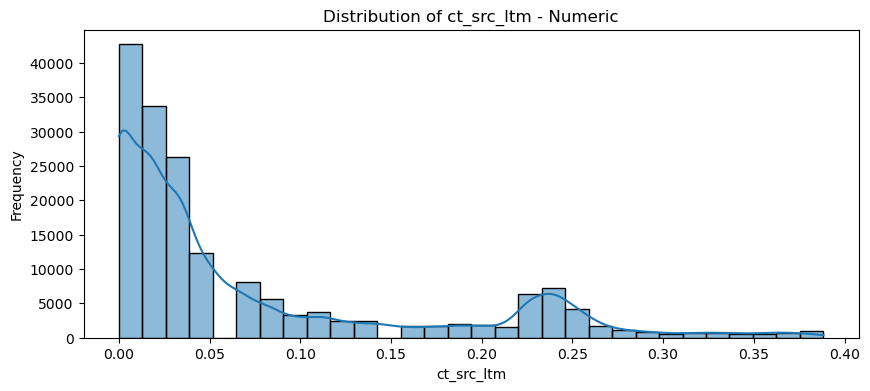

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


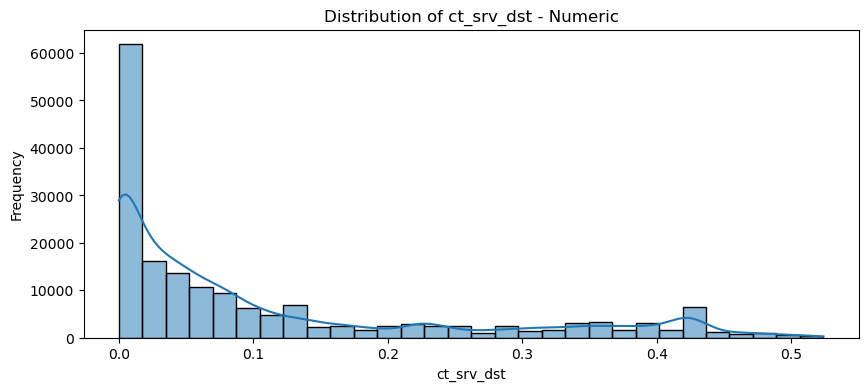

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


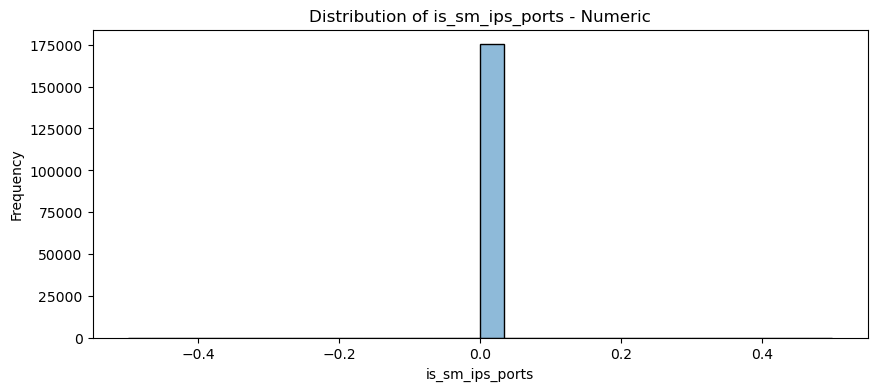

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


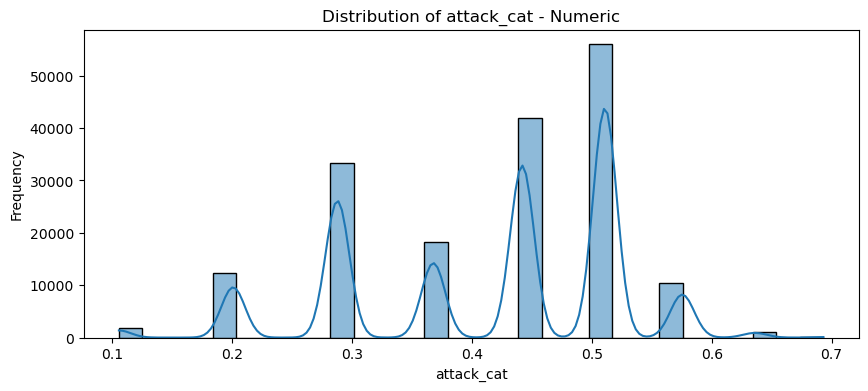

C:\Users\anjal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


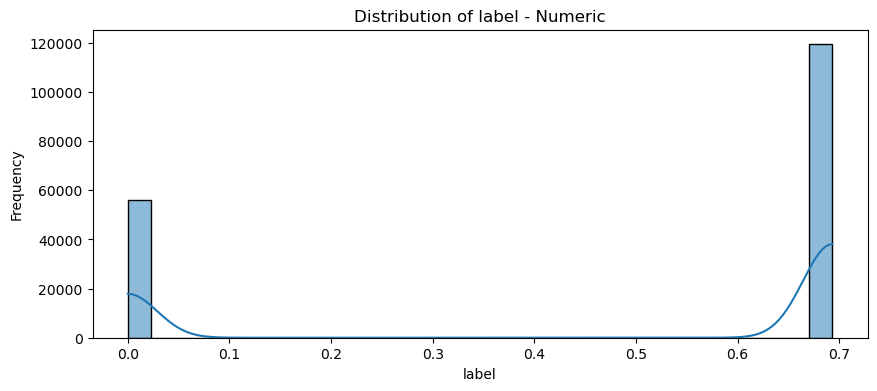

In [162]:
# Before log transformation
# representation of skewed data:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
# Iterate over each column in the DataFrame
for column in data_encoded_log.columns:
    plt.figure(figsize=(10, 4))
    # Check if the column is numeric or categorical
    if pd.api.types.is_numeric_dtype(data_encoded_log[column]):
        # Plot distribution of numeric columns
        sns.histplot(data_encoded_log[column], kde=True, bins=30)
        plt.title(f'Distribution of {column} - Numeric')
    else:
        # Plot count of categorical columns
        sns.countplot(y=column, data=data_encoded_log, order=data_encoded_log[column].value_counts().index)
        plt.title(f'Distribution of {column} - Categorical')

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# applied z-score for detecting outliers:

In [76]:
import numpy as np
from scipy import stats

# Assuming `data_encoded` is your DataFrame with all numeric data
# Calculate Z-scores
z_scores = np.abs(stats.zscore(data_encoded_log))

# Define a threshold
threshold = 3

# Get boolean array where true represents the presence of an outlier
outliers = (z_scores > threshold)

# Optional: Get the actual data points that are considered outliers
outlier_points = data_encoded[(z_scores > threshold).any(axis=1)]


In [77]:
outlier_points

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
2,2.623129,114,13,3,9,17,365,13187,15.170161,63,...,2,4,1,1,1,3,7,1,7,1
3,2.681642,114,3,3,13,13,629,771,14.677108,63,...,2,4,2,2,1,3,2,1,7,1
11,3.093085,114,9,3,63,29,56330,2213,43.520967,63,...,2,3,1,1,1,2,2,1,7,1
12,1.416952,114,13,3,11,7,535,269,36.975363,255,...,2,41,1,1,1,2,40,1,7,1
15,1.000002,120,10,4,3,1,139,1,500001.001300,255,...,2,5,1,1,1,3,2,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175334,1.000006,120,2,4,3,1,115,1,166667.660800,255,...,18,46,1,1,1,34,46,1,6,2
175335,1.000006,120,2,4,3,1,115,1,166667.660800,255,...,18,46,1,1,1,34,46,1,6,2
175336,1.000009,120,2,4,3,1,115,1,111112.107200,255,...,14,25,1,1,1,25,25,1,6,2
175339,1.000009,120,2,4,3,1,115,1,111112.107200,255,...,15,31,1,1,1,31,31,1,6,2


In [78]:
# Example: Replacing outliers with the median
median = data_encoded_log.median()
z_scores = np.abs(stats.zscore(data_encoded_log))
outlier_positions = z_scores > 3
data_encoded_log[outlier_positions] = np.nan
data_encoded_log.fillna(median, inplace=True)

In [125]:
data_encoded_log

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,2.022587e-03,0.618456,0.693147,0.223144,0.000520,0.000364,0.000018,0.000012,0.000074,0.687247,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.510826,0.000000
1,1.077346e-02,0.618456,0.693147,0.223144,0.001351,0.003457,0.000054,0.002863,0.000078,0.217638,...,0.000000,0.015504,0.0,0.0,0.0,0.000000,0.078781,0.0,0.510826,0.000000
2,2.669271e-02,0.618456,0.693147,0.223144,0.000728,0.001457,0.000026,0.000899,0.000014,0.217638,...,0.000000,0.030772,0.0,0.0,0.0,0.016807,0.078781,0.0,0.510826,0.000000
3,2.764179e-02,0.618456,0.154151,0.223144,0.001143,0.001093,0.000046,0.000053,0.000014,0.217638,...,0.000000,0.030772,0.0,0.0,0.0,0.016807,0.000000,0.0,0.510826,0.000000
4,7.462984e-03,0.618456,0.693147,0.223144,0.000936,0.000547,0.000039,0.000018,0.000033,0.691184,...,0.000000,0.475846,0.0,0.0,0.0,0.016807,0.484246,0.0,0.510826,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,1.500000e-07,0.642651,0.080043,0.318454,0.000104,0.000000,0.000007,0.000000,0.105361,0.691184,...,0.236389,0.307025,0.0,0.0,0.0,0.329182,0.319943,0.0,0.441833,0.693147
175337,8.394039e-03,0.618456,0.693147,0.223144,0.000936,0.000729,0.000046,0.000024,0.000034,0.691184,...,0.000000,0.015504,0.0,0.0,0.0,0.000000,0.000000,0.0,0.635989,0.693147
175338,1.500000e-07,0.642651,0.080043,0.318454,0.000104,0.000000,0.000007,0.000000,0.105361,0.691184,...,0.043485,0.171850,0.0,0.0,0.0,0.033336,0.165792,0.0,0.441833,0.693147
175339,1.500000e-07,0.642651,0.080043,0.318454,0.000104,0.000000,0.000007,0.000000,0.105361,0.691184,...,0.253781,0.373716,0.0,0.0,0.0,0.033336,0.388936,0.0,0.441833,0.693147


# applying embedded method:

In [ ]:
# for feature selection:

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Assuming 'X' is your set of features and 'y' is the categorical target variable
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(data_encoded_log, y)

# Get feature importances
importances = rf_clf.feature_importances_

# Create a model selector object
model_selector = SelectFromModel(rf_clf, prefit=True, threshold='mean')  # or use a custom threshold

# Select features based on importance
X_important = model_selector.transform(data_encoded_log)

# Now X_important contains the most important features as determined by the Random Forest model.


C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [127]:
X_important.shape

(175341, 11)

In [128]:
X_important

array([[6.93147181e-01, 1.77396316e-05, 6.87247458e-01, ...,
        0.00000000e+00, 5.10825624e-01, 0.00000000e+00],
       [6.93147181e-01, 5.44519565e-05, 2.17638229e-01, ...,
        7.87808779e-02, 5.10825624e-01, 0.00000000e+00],
       [6.93147181e-01, 2.59151819e-05, 2.17638229e-01, ...,
        7.87808779e-02, 5.10825624e-01, 0.00000000e+00],
       ...,
       [8.00427077e-02, 6.63311647e-06, 6.91184471e-01, ...,
        1.65792255e-01, 4.41832752e-01, 6.93147181e-01],
       [8.00427077e-02, 6.63311647e-06, 6.91184471e-01, ...,
        3.88935806e-01, 4.41832752e-01, 6.93147181e-01],
       [8.00427077e-02, 6.63311647e-06, 6.91184471e-01, ...,
        3.88935806e-01, 4.41832752e-01, 6.93147181e-01]])

In [129]:
# Assuming 'model_selector' is your SelectFromModel object and 'X' is the original DataFrame
selected_features = data_encoded_log.columns[model_selector.get_support()]

print(selected_features)

Index(['service', 'sbytes', 'sttl', 'smean', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'attack_cat',
       'label'],
      dtype='object')


In [55]:
# difference between feature selection and feature extraction

In [130]:
final_df = data_encoded_log[selected_features]

# Show the first few rows of the new DataFrame to verify it looks correct
print(final_df)

         service    sbytes      sttl     smean  ct_srv_src  ct_state_ttl  \
0       0.693147  0.000018  0.687247  0.010111    0.000000      0.000000   
1       0.693147  0.000054  0.217638  0.016129    0.517257      0.154151   
2       0.693147  0.000026  0.217638  0.012121    0.092373      0.154151   
3       0.154151  0.000046  0.217638  0.016129    0.000000      0.154151   
4       0.693147  0.000039  0.691184  0.016796    0.517257      0.154151   
...          ...       ...       ...       ...         ...           ...   
175336  0.080043  0.000007  0.691184  0.019457    0.315517      0.287682   
175337  0.693147  0.000046  0.691184  0.022774    0.000000      0.154151   
175338  0.080043  0.000007  0.691184  0.019457    0.163325      0.287682   
175339  0.080043  0.000007  0.691184  0.019457    0.383725      0.287682   
175340  0.080043  0.000007  0.691184  0.019457    0.383725      0.287682   

        ct_dst_sport_ltm  ct_dst_src_ltm  ct_srv_dst  attack_cat     label  
0         

In [56]:
y.value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

In [53]:
y.shape

(175341,)

In [ ]:
# checking the distribution of the data, before balancing the data:

In [131]:
print("Original Distribution")
print(y.value_counts(normalize=True))  # Normalized to show proportions

#print("\nSampled Distribution")
#print(final_df['target'].val|ue_counts(normalize=True))  # Should be similar to the original distribution


Original Distribution
attack_cat
Normal            0.319378
Generic           0.228127
Exploits          0.190446
Fuzzers           0.103706
DoS               0.069944
Reconnaissance    0.059832
Analysis          0.011406
Backdoor          0.009958
Shellcode         0.006462
Worms             0.000741
Name: proportion, dtype: float64


In [61]:
# the data is imbalanced.

In [62]:
!pip install -U imbalanced-learn


In [ ]:
# balancing the dataset after feature selection. Applying SMOTE on the training dataset of 'final_df':

In [ ]:
# dividing the 'final_df' dataset into training and testing.

In [ ]:
# appling: Stratified sampling ----> dividing the data into training and testing----> applying SMOTE to the training dataset.

In [102]:
# applying modelling:

In [133]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'final_df' is your features and 'y' is your target.

# Step 1: Stratified sampling to keep 20% of the data.
X_sample__, X_discard__, y_sample__, y_discard__ = train_test_split(
    final_df, y,
    test_size=0.5,   # Discarding 50% of the data
    stratify=y,
    random_state=42
)

# Step 2: Dividing sampled data into training and test sets.
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_sample__, y_sample__,
    test_size=0.3,
    random_state = 42
)

# Step 3: Applying SMOTE to the training dataset to balance it.
smote = SMOTE(random_state=100)
X_balanced1, y_balanced1 = smote.fit_resample(X_train1, y_train1)

# Step 4: Encoding the balanced target variable if necessary.
label_encoder = LabelEncoder()
y_balanced_encoded = label_encoder.fit_transform(y_balanced1)


In [135]:
y_balanced_encoded

array([5, 7, 4, ..., 9, 9, 9])

In [136]:
results_df = pd.DataFrame({'Actual': y_test_encoded, 'Predicted': y_test_pred})
results_df

,Actual,Predicted
0,6,6
1,3,3
2,3,3
3,6,6
4,6,6
...,...,...
26296,7,7
26297,6,6
26298,3,3
26299,6,6


In [81]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.3/99.8 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 0.8/99.8 MB 5.1 MB/s eta 0:00:20
   ---------------------------------------- 0.8/99.8 MB 5.1 MB/s eta 0:00:20
   ---------------------------------------- 1.2/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 1.9/99.8 MB 6.2 MB/s eta 0:00:16
    --------------------------------------- 2.4/99.8 MB 7.1 MB/s eta 0:00:14
   - -------------------------------------- 3.3/99.8 MB 8.1 MB/s eta 0:00:12
   - --------------------------------

In [ ]:
# applying the models inidividually: 

In [137]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [138]:
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder instance
label_encoder = LabelEncoder()
label_encoder.fit(y_test1)


LabelEncoder()

In [139]:
# KNN: 
knn= KNeighborsClassifier(n_neighbors=5)

knn.fit(X_balanced1, y_balanced_encoded)

y_train_pred3 = knn.predict(X_balanced1)
train_accuracy3 = accuracy_score(y_balanced_encoded, y_train_pred3)
print(f"Training Accuracy: {train_accuracy3}")

y_test_pred3 = knn.predict(X_test1)
test_accuracy3 = accuracy_score(y_test_encoded, y_test_pred3)
print(f"Testing Accuracy: {test_accuracy3}")

# Generate the classification report
report = classification_report(y_test_encoded, y_test_pred3, target_names=class_names)

print(report)

result3 = pd.DataFrame({'Actual': y_test_encoded, 'Predicted': y_test_pred3})
result3

Training Accuracy: 0.9955895912304067
Testing Accuracy: 0.9965020341431885
                precision    recall  f1-score   support

      Analysis       0.84      0.94      0.89       300
      Backdoor       1.00      1.00      1.00       244
           DoS       1.00      1.00      1.00      1846
      Exploits       1.00      1.00      1.00      4988
       Fuzzers       1.00      1.00      1.00      2710
       Generic       1.00      0.99      0.99      5948
        Normal       1.00      1.00      1.00      8478
Reconnaissance       1.00      1.00      1.00      1583
     Shellcode       1.00      0.99      1.00       187
         Worms       1.00      1.00      1.00        17

      accuracy                           1.00     26301
     macro avg       0.98      0.99      0.99     26301
  weighted avg       1.00      1.00      1.00     26301



,Actual,Predicted
0,6,6
1,3,3
2,3,3
3,6,6
4,6,6
...,...,...
26296,7,7
26297,6,6
26298,3,3
26299,6,6


In [155]:
# knn:
from sklearn.metrics import confusion_matrix
conf_matrix3 = confusion_matrix(y_test_encoded, y_test_pred3)
conf_matrix3

array([[ 282,    0,    0,    0,    0,   18,    0,    0,    0,    0],
       [   0,  244,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1841,    4,    1,    0,    0,    0,    0,    0],
       [   0,    0,    5, 4977,    6,    0,    0,    0,    0,    0],
       [   0,    0,    0,    1, 2708,    1,    0,    0,    0,    0],
       [  53,    0,    0,    1,    1, 5893,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 8478,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1583,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,  186,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   17]],
      dtype=int64)

In [94]:
logr = LogisticRegression()

logr.fit(X_balanced1, y_balanced_encoded)

y_train_pred2 = logr.predict(X_balanced1)
train_accuracy2 = accuracy_score(y_balanced_encoded, y_train_pred2)
print(f"Training Accuracy: {train_accuracy2}")

# y_pred2 = logr.predict(X_test1)

y_test_pred2 = logr.predict(X_test1)
test_accuracy2 = accuracy_score(y_test_encoded, y_test_pred2)
print(f"Testing Accuracy: {test_accuracy2}")

# Generate the classification report
report = classification_report(y_test_encoded, y_test_pred2, target_names=class_names)

print(report)

result2 = pd.DataFrame({'Actual': y_test_encoded, 'Predicted': y_test_pred2})
result2

Training Accuracy: 0.9660331933203565
Testing Accuracy: 0.971750123569446
                precision    recall  f1-score   support

      Analysis       0.41      0.98      0.58       300
      Backdoor       1.00      1.00      1.00       244
           DoS       1.00      1.00      1.00      1846
      Exploits       1.00      0.95      0.97      4988
       Fuzzers       0.91      0.88      0.89      2710
       Generic       1.00      0.98      0.99      5948
        Normal       1.00      1.00      1.00      8478
Reconnaissance       1.00      0.96      0.98      1583
     Shellcode       0.89      0.98      0.94       187
         Worms       0.67      0.94      0.78        17

      accuracy                           0.97     26301
     macro avg       0.89      0.97      0.91     26301
  weighted avg       0.98      0.97      0.97     26301



C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Actual,Predicted
0,6,6
1,3,3
2,3,3
3,6,6
4,6,6
...,...,...
26296,7,7
26297,6,6
26298,3,3
26299,6,6


In [144]:
# Logistic regression: 
from sklearn.metrics import confusion_matrix
conf_matrix2 = confusion_matrix(y_test_encoded, y_test_pred2)
conf_matrix2

array([[ 294,    0,    0,    0,    6,    0,    0,    0,    0,    0],
       [   0,  244,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1843,    3,    0,    0,    0,    0,    0,    0],
       [  34,    0,    0, 4760,  191,    3,    0,    0,    0,    0],
       [ 279,    0,    0,   17, 2390,   24,    0,    0,    0,    0],
       [  70,    0,    0,    0,   48, 5830,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 8478,    0,    0,    0],
       [  35,    0,    0,    0,    0,    0,    0, 1519,   21,    8],
       [   0,    0,    0,    0,    0,    0,    0,    3,  184,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,   16]],
      dtype=int64)

In [ ]:
# applying all the models individually: 
from sklearn import metrics

rf_bin = RandomForestClassifier(random_state=123)
rf_bin.fit(X_balanced1, y_balanced_encoded)

y_test_pred1 = rf_bin.predict(X_test1)

print("Accuracy - ",accuracy_score(y_test_encoded,y_test_pred1)*100)

cls_report = classification_report(y_true=y_test_encoded, y_pred=y_test_pred, target_names=class_names)
print(cls_report)

result1 = pd.DataFrame({'Actual': y_test_encoded, 'Predicted': y_test_pred1})
result1

In [64]:
import pandas as pd

# Assuming y_train_pred and y_test_pred are the predictions for training and testing sets
# Ensure both arrays have the same length
min_length = min(len(y_train_pred), len(y_test_pred))
y_train_pred = y_train_pred[:min_length]
y_test_pred = y_test_pred[:min_length]

# Create a DataFrame to compare predictions
comparison_df = pd.DataFrame({
    'y_train_pred': y_train_pred,
    'y_test_pred': y_test_pred
})

# Display the DataFrame
print(comparison_df)


       y_train_pred  y_test_pred
0                 5            6
1                 7            3
2                 4            3
3                 6            6
4                 6            6
...             ...          ...
26296             6            7
26297             3            6
26298             6            3
26299             6            6
26300             6            3

[26301 rows x 2 columns]


Comparing model performances


# performing without scaling, on the data: data_encoded

In [95]:
data_encoded += 1

# Apply log transformation
data_encoded_log_ = np.log1p(data_encoded)


# Checking for infinite values
if np.isinf(data_encoded_log_).any().any():
    print("Infinite values detected")


data_encoded_log_.replace(-np.inf, np.nan, inplace=True)

In [96]:
data_encoded_log_

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1.138307,4.753590,2.708050,1.609438,2.197225,1.945910,5.564520,5.164786,4.344941,5.541264,...,1.386294,1.386294,1.098612,1.098612,1.098612,1.386294,1.386294,1.098612,2.197225,1.098612
1,1.294700,4.753590,2.708050,1.609438,2.833213,3.713572,6.602588,10.645830,4.400276,4.174387,...,1.386294,1.609438,1.098612,1.098612,1.098612,1.386294,2.197225,1.098612,2.197225,1.098612
2,1.531072,4.753590,2.708050,1.609438,2.397895,2.944439,5.905362,9.487138,2.843173,4.174387,...,1.386294,1.791759,1.098612,1.098612,1.098612,1.609438,2.197225,1.098612,2.197225,1.098612
3,1.543649,4.753590,1.609438,1.609438,2.708050,2.708050,6.447306,6.650279,2.814037,4.174387,...,1.386294,1.791759,1.386294,1.386294,1.098612,1.609438,1.386294,1.098612,2.197225,1.098612
4,1.238216,4.753590,2.708050,1.609438,2.564949,2.197225,6.285998,5.602119,3.593849,5.549076,...,1.386294,3.761200,1.098612,1.098612,1.098612,1.609438,3.737670,1.098612,2.197225,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,1.098615,4.804021,1.386294,1.791759,1.609438,1.098612,4.762174,1.098612,11.618313,5.549076,...,2.772589,3.295837,1.098612,1.098612,1.098612,3.295837,3.295837,1.098612,2.079442,1.386294
175337,1.254408,4.753590,2.708050,1.609438,2.564949,2.397895,6.434547,5.877736,3.600394,5.549076,...,1.386294,1.609438,1.098612,1.098612,1.098612,1.386294,1.386294,1.098612,2.397895,1.386294
175338,1.098615,4.804021,1.386294,1.791759,1.609438,1.098612,4.762174,1.098612,11.618313,5.549076,...,1.791759,2.772589,1.098612,1.098612,1.098612,1.791759,2.708050,1.098612,2.079442,1.386294
175339,1.098615,4.804021,1.386294,1.791759,1.609438,1.098612,4.762174,1.098612,11.618313,5.549076,...,2.833213,3.496508,1.098612,1.098612,1.098612,3.496508,3.496508,1.098612,2.079442,1.386294


In [98]:
import numpy as np
from scipy import stats

# Assuming `data_encoded` is your DataFrame with all numeric data
# Calculate Z-scores
z_scores = np.abs(stats.zscore(data_encoded_log_))

# Define a threshold
threshold = 3

# Get boolean array where true represents the presence of an outlier
outliers_ = (z_scores > threshold)

# Optional: Get the actual data points that are considered outliers
outlier_points_ = data_encoded[(z_scores > threshold).any(axis=1)]

In [99]:
outlier_points_

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,3.681642,115,4,4,14,14,630,772,15.677108,64,...,3,5,3,3,2,4,3,2,8,2
11,4.093085,115,10,4,64,30,56331,2214,44.520967,64,...,3,4,2,2,2,3,3,2,8,2
22,2.964656,115,4,2,16,14,692,952,27.915974,64,...,3,4,3,3,2,4,3,2,8,2
30,2.725996,115,6,4,12,18,824,12222,36.435451,64,...,3,4,2,2,3,4,3,2,8,2
32,2.337456,115,6,4,12,10,802,2262,52.376940,64,...,3,3,2,2,3,3,10,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175112,6.079689,115,10,4,160,44,182787,2626,50.778228,64,...,3,3,2,2,2,4,3,2,5,3
175182,4.724847,115,10,4,62,32,51669,2064,34.662383,64,...,3,3,2,2,2,3,3,2,5,3
175248,4.013791,115,10,4,228,52,272072,3086,138.558356,64,...,3,3,2,2,2,20,3,2,4,3
175267,3.914309,115,10,4,76,32,69999,2134,55.805315,64,...,3,3,2,2,2,20,3,2,5,3


In [114]:
# Example: Replacing outliers with the median

median_ = data_encoded_log_.median()
z_scores_ = np.abs(stats.zscore(data_encoded_log_))
outlier_positions_ = z_scores_ > 3
data_encoded_log_[outlier_positions_] = np.nan
data_encoded_log_.fillna(median_, inplace=True)

In [ ]:
# performing embedded method: 

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Assuming 'X' is your set of features and 'y' is the categorical target variable
rf_clf_ = RandomForestClassifier(n_estimators=100)
rf_clf_.fit(data_encoded_log_, y)

# Get feature importances
importances_ = rf_clf_.feature_importances_

# Create a model selector object
model_selector = SelectFromModel(rf_clf_, prefit=True, threshold='mean')  

# Select features based on importance
X_important_ = model_selector.transform(data_encoded_log_)

C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [117]:
X_important_.shape

(175341, 11)

In [118]:
y

0            Normal
1            Normal
2            Normal
3            Normal
4            Normal
            ...    
175336      Generic
175337    Shellcode
175338      Generic
175339      Generic
175340      Generic
Name: attack_cat, Length: 175341, dtype: object

In [119]:
final_df_ = data_encoded_log_[selected_features]

# Show the first few rows of the new DataFrame to verify it looks correct
final_df_

,service,sbytes,sttl,smean,ct_srv_src,ct_state_ttl,ct_dst_sport_ltm,ct_dst_src_ltm,ct_srv_dst,attack_cat,label
0,2.708050,5.564520,5.541264,3.828641,1.386294,1.098612,1.386294,1.386294,1.386294,2.197225,1.098612
1,2.708050,6.602588,4.174387,4.007333,3.828641,1.386294,1.386294,1.609438,2.197225,2.197225,1.098612
2,2.708050,5.905362,4.174387,3.891820,2.302585,1.386294,1.386294,1.791759,2.197225,2.197225,1.098612
3,1.609438,6.447306,4.174387,4.007333,1.386294,1.386294,1.386294,1.791759,1.386294,2.197225,1.098612
4,2.708050,6.285998,5.549076,4.025352,3.828641,1.386294,1.386294,3.761200,3.737670,2.197225,1.098612
...,...,...,...,...,...,...,...,...,...,...,...
175336,1.386294,4.762174,5.549076,4.094345,3.295837,1.609438,2.772589,3.295837,3.295837,2.079442,1.386294
175337,2.708050,6.434547,5.549076,4.174387,1.386294,1.386294,1.386294,1.609438,1.386294,2.397895,1.386294
175338,1.386294,4.762174,5.549076,4.094345,2.708050,1.609438,1.791759,2.772589,2.708050,2.079442,1.386294
175339,1.386294,4.762174,5.549076,4.094345,3.496508,1.609438,2.833213,3.496508,3.496508,2.079442,1.386294


In [109]:
# Step 1: Stratified sampling to keep 20% of the data.
X_sample1, X_discard1, y_sample1, y_discard1 = train_test_split(
    final_df_, y,
    test_size = 0.5,   # Discarding 50% of the data
    stratify = y,
    random_state = 42
)

# Step 2: Dividing sampled data into training and test sets.
X_train11, X_test11, y_train11, y_test11 = train_test_split(
    X_sample1, y_sample1,
    test_size = 0.3,
    random_state = 42
)

# Step 3: Applying SMOTE to the training dataset to balance it.
smote = SMOTE(random_state = 100)
X_balanced11, y_balanced11 = smote.fit_resample(X_train11, y_train11)

# Step 4: Encoding the balanced target variable if necessary.
label_encoder_ = LabelEncoder()
y_balanced_encoded_ = label_encoder_.fit_transform(y_balanced1)

In [156]:
X_sample1

,service,sbytes,sttl,smean,ct_srv_src,ct_state_ttl,ct_dst_sport_ltm,ct_dst_src_ltm,ct_srv_dst,attack_cat,label
15018,2.708050,7.711101,3.526361,4.234107,2.484907,1.098612,1.386294,1.386294,2.197225,2.197225,1.098612
118015,2.708050,6.415097,5.549076,4.158883,2.079442,1.386294,1.386294,1.386294,1.609438,1.791759,1.386294
34682,1.945910,7.430707,3.526361,4.812184,1.386294,1.098612,1.386294,1.386294,1.609438,2.197225,1.098612
62000,2.708050,5.141664,5.549076,4.465908,1.609438,1.609438,1.609438,1.609438,1.609438,2.302585,1.386294
48397,2.708050,6.285998,5.549076,4.025352,1.945910,1.386294,1.386294,1.945910,1.945910,1.945910,1.386294
...,...,...,...,...,...,...,...,...,...,...,...
146539,1.386294,4.762174,5.549076,4.094345,3.218876,1.609438,2.995732,3.218876,3.218876,2.079442,1.386294
71376,2.708050,5.313206,5.549076,4.634729,2.302585,1.609438,1.791759,2.302585,2.302585,1.386294,1.386294
145740,1.386294,4.762174,5.549076,4.094345,3.850148,1.609438,2.833213,3.850148,3.850148,2.079442,1.386294
100153,2.708050,7.090910,4.174387,4.043051,1.386294,1.386294,1.386294,1.386294,1.386294,1.791759,1.386294


In [157]:
X_test11

,service,sbytes,sttl,smean,ct_srv_src,ct_state_ttl,ct_dst_sport_ltm,ct_dst_src_ltm,ct_srv_dst,attack_cat,label
29106,2.708050,7.629004,3.526361,4.564348,2.079442,1.098612,1.386294,1.945910,1.791759,2.197225,1.098612
63790,2.397895,10.455705,4.174387,6.630683,1.386294,1.386294,1.386294,1.386294,1.386294,1.791759,1.386294
92451,2.708050,6.415097,5.549076,4.158883,1.386294,1.386294,1.386294,1.386294,1.386294,1.791759,1.386294
86006,2.708050,7.472501,5.549076,4.330733,2.639057,1.609438,1.386294,2.564949,2.564949,2.197225,1.098612
36391,1.945910,7.430707,3.526361,4.812184,1.386294,1.098612,1.386294,1.386294,1.609438,2.197225,1.098612
...,...,...,...,...,...,...,...,...,...,...,...
77952,2.708050,5.141664,5.549076,4.465908,1.791759,1.609438,1.386294,1.386294,1.386294,2.302585,1.386294
33698,1.386294,4.890349,3.526361,4.219508,1.791759,1.098612,1.386294,1.386294,1.609438,2.197225,1.098612
64589,2.708050,8.015327,5.549076,4.709530,1.386294,1.609438,1.386294,1.386294,1.386294,1.791759,1.386294
37076,1.791759,6.056784,3.526361,4.025352,1.609438,1.098612,1.386294,1.609438,2.484907,2.197225,1.098612


# performing Modelling: 

In [120]:
dt = DecisionTreeClassifier(random_state=123)

dt.fit(X_balanced11, y_balanced_encoded_)

y_train_pred_4 = dt.predict(X_balanced11)
train_accuracy_4 = accuracy_score(y_balanced_encoded_, y_train_pred_4)
print(f"Training Accuracy: {train_accuracy_4}")

y_test_pred_4 = dt.predict(X_test11)
y_test_encoded_ = label_encoder.transform(y_test11)
test_accuracy_4 = accuracy_score(y_test_encoded_, y_test_pred_4)
print(f"Testing Accuracy: {test_accuracy_4}")


from sklearn.metrics import classification_report
class_names = label_encoder.classes_

# Generate the classification report
report_4 = classification_report(y_test_encoded_, y_test_pred_4, target_names=class_names)
print(report)


result_4 = pd.DataFrame({'Actual': y_test_encoded_, 'Predicted': y_test_pred_4})
result_4

Training Accuracy: 0.9993699416043438
Testing Accuracy: 0.9980228888635413
                precision    recall  f1-score   support

      Analysis       0.41      0.98      0.58       300
      Backdoor       1.00      1.00      1.00       244
           DoS       1.00      1.00      1.00      1846
      Exploits       1.00      0.95      0.97      4988
       Fuzzers       0.91      0.88      0.89      2710
       Generic       1.00      0.98      0.99      5948
        Normal       1.00      1.00      1.00      8478
Reconnaissance       1.00      0.96      0.98      1583
     Shellcode       0.89      0.98      0.94       187
         Worms       0.67      0.94      0.78        17

      accuracy                           0.97     26301
     macro avg       0.89      0.97      0.91     26301
  weighted avg       0.98      0.97      0.97     26301



,Actual,Predicted
0,6,6
1,3,3
2,3,3
3,6,6
4,6,6
...,...,...
26296,7,7
26297,6,6
26298,3,3
26299,6,6


In [153]:
# decision tree: 
conf_matrix4 = confusion_matrix(y_test_encoded, y_test_pred_4)
conf_matrix4

array([[ 298,    0,    0,    0,    0,    2,    0,    0,    0,    0],
       [   0,  244,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1846,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 4988,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2710,    0,    0,    0,    0,    0],
       [  50,    0,    0,    0,    0, 5898,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 8478,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1583,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  187,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   17]],
      dtype=int64)

In [158]:
gb_ = GradientBoostingClassifier(random_state=42)

gb_.fit(X_balanced11, y_balanced_encoded_)

y_train_pred_5 = gb_.predict(X_balanced11)
train_accuracy_5 = accuracy_score(y_balanced_encoded_, y_train_pred_5)
print(f"Training Accuracy: {train_accuracy_5}")

y_test_pred_5 = gb_.predict(X_test11)
y_test_encoded_ = label_encoder.transform(y_test11)
test_accuracy_5 = accuracy_score(y_test_encoded_, y_test_pred_5)
print(f"Testing Accuracy: {test_accuracy_5}")


from sklearn.metrics import classification_report
class_names = label_encoder.classes_

# Generate the classification report
report_5 = classification_report(y_test_encoded_, y_test_pred_5, target_names=class_names)
print(report)


result_5 = pd.DataFrame({'Actual': y_test_encoded_, 'Predicted': y_test_pred_5})
result_5

Training Accuracy: 0.9991804118430488
Testing Accuracy: 0.9978327820234972
                precision    recall  f1-score   support

      Analysis       0.84      0.94      0.89       300
      Backdoor       1.00      1.00      1.00       244
           DoS       1.00      1.00      1.00      1846
      Exploits       1.00      1.00      1.00      4988
       Fuzzers       1.00      1.00      1.00      2710
       Generic       1.00      0.99      0.99      5948
        Normal       1.00      1.00      1.00      8478
Reconnaissance       1.00      1.00      1.00      1583
     Shellcode       1.00      0.99      1.00       187
         Worms       1.00      1.00      1.00        17

      accuracy                           1.00     26301
     macro avg       0.98      0.99      0.99     26301
  weighted avg       1.00      1.00      1.00     26301



,Actual,Predicted
0,6,6
1,3,3
2,3,3
3,6,6
4,6,6
...,...,...
26296,7,7
26297,6,6
26298,3,3
26299,6,6


In [159]:
# gradient boosting classifier: 

from sklearn.metrics import confusion_matrix

conf_matrix5 = confusion_matrix(y_test_encoded, y_test_pred_5)

conf_matrix5

array([[ 297,    0,    0,    0,    0,    3,    0,    0,    0,    0],
       [   0,  244,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1846,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 4988,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2710,    0,    0,    0,    0,    0],
       [  54,    0,    0,    0,    0, 5894,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 8478,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1583,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  187,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   17]],
      dtype=int64)

In [160]:
conf_matrix5

array([[ 297,    0,    0,    0,    0,    3,    0,    0,    0,    0],
       [   0,  244,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1846,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 4988,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2710,    0,    0,    0,    0,    0],
       [  54,    0,    0,    0,    0, 5894,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 8478,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1583,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  187,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   17]],
      dtype=int64)

In [151]:
xgb_ = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

xgb_.fit(X_balanced11, y_balanced_encoded_)

y_train_pred_6 = xgb_.predict(X_balanced11)
train_accuracy_6 = accuracy_score(y_balanced_encoded_, y_train_pred_6)
print(f"Training Accuracy: {train_accuracy_6}")

y_test_pred_6 = gb_.predict(X_test11)
y_test_encoded_ = label_encoder.transform(y_test11)
test_accuracy_6 = accuracy_score(y_test_encoded_, y_test_pred_6)
print(f"Testing Accuracy: {test_accuracy_6}")

cls_report = classification_report(y_true=y_test_encoded, y_pred=y_test_pred_6, target_names=class_names)
print(cls_report)

result6 = pd.DataFrame({'Actual': y_test_encoded, 'Predicted': y_test_pred_6})
result6

Training Accuracy: 0.9993340846224772
Testing Accuracy: 0.9978327820234972
                precision    recall  f1-score   support

      Analysis       0.85      0.99      0.91       300
      Backdoor       1.00      1.00      1.00       244
           DoS       1.00      1.00      1.00      1846
      Exploits       1.00      1.00      1.00      4988
       Fuzzers       1.00      1.00      1.00      2710
       Generic       1.00      0.99      1.00      5948
        Normal       1.00      1.00      1.00      8478
Reconnaissance       1.00      1.00      1.00      1583
     Shellcode       1.00      1.00      1.00       187
         Worms       1.00      1.00      1.00        17

      accuracy                           1.00     26301
     macro avg       0.98      1.00      0.99     26301
  weighted avg       1.00      1.00      1.00     26301



,Actual,Predicted
0,6,6
1,3,3
2,3,3
3,6,6
4,6,6
...,...,...
26296,7,7
26297,6,6
26298,3,3
26299,6,6


In [152]:
# xgboost:

conf_matrix6 = confusion_matrix(y_test_encoded, y_test_pred_6)
conf_matrix6

array([[ 297,    0,    0,    0,    0,    3,    0,    0,    0,    0],
       [   0,  244,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1846,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 4988,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2710,    0,    0,    0,    0,    0],
       [  54,    0,    0,    0,    0, 5894,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 8478,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1583,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  187,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   17]],
      dtype=int64)

In [147]:
clf_ = RandomForestClassifier(random_state=100)

clf_.fit(X_balanced11, y_balanced_encoded_)

y_train_pred_1 = clf_.predict(X_balanced11)
train_accuracy_1 = accuracy_score(y_balanced_encoded_, y_train_pred_1)
print(f"Training Accuracy: {train_accuracy_1}")

y_test_pred_1 = clf_.predict(X_test11)
y_test_encoded_ = label_encoder.transform(y_test11)
test_accuracy_1 = accuracy_score(y_test_encoded_, y_test_pred_1)
print(f"Testing Accuracy: {test_accuracy_1}")


from sklearn.metrics import classification_report
class_names = label_encoder.classes_

# Generate the classification report
report_1 = classification_report(y_test_encoded_, y_test_pred_1, target_names=class_names)
print(report)


result_1 = pd.DataFrame({'Actual': y_test_encoded_, 'Predicted': y_test_pred_1})
result_1

Training Accuracy: 0.9993699416043438
Testing Accuracy: 0.998098931599559
                precision    recall  f1-score   support

      Analysis       0.84      0.94      0.89       300
      Backdoor       1.00      1.00      1.00       244
           DoS       1.00      1.00      1.00      1846
      Exploits       1.00      1.00      1.00      4988
       Fuzzers       1.00      1.00      1.00      2710
       Generic       1.00      0.99      0.99      5948
        Normal       1.00      1.00      1.00      8478
Reconnaissance       1.00      1.00      1.00      1583
     Shellcode       1.00      0.99      1.00       187
         Worms       1.00      1.00      1.00        17

      accuracy                           1.00     26301
     macro avg       0.98      0.99      0.99     26301
  weighted avg       1.00      1.00      1.00     26301



,Actual,Predicted
0,6,6
1,3,3
2,3,3
3,6,6
4,6,6
...,...,...
26296,7,7
26297,6,6
26298,3,3
26299,6,6


In [149]:
# Random forest classifier

from sklearn.metrics import confusion_matrix

conf_matrix3 = confusion_matrix(y_test_encoded, y_test_pred_1)

conf_matrix_values
conf_matrix3

array([[ 295,    0,    0,    0,    1,    4,    0,    0,    0,    0],
       [   0,  244,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1846,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 4988,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2710,    0,    0,    0,    0,    0],
       [  41,    0,    0,    0,    3, 5904,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 8478,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0, 1582,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  187,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   17]],
      dtype=int64)